In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

data = pd.read_csv("StudentPerformanceFactors.csv")

ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]

LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)

NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)

PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)

EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)

GENDERMAP = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(GENDERMAP)

NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)

SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [90]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
5                        Yes            8               89           Medium   
6                        Yes            7               68              Low   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
5             Yes                  3        Medium          Medium   
6             Yes                  1           Low          Medium   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
5      Public       Positive                  3                    No   
6     Private        Neutral                  2                    No   

  Parental_Education_Level Distance_from_Home Gender  Exam_Score  
0              High School               Near   Male          67  
2             Postgraduate               Near   Male          74  
3              High School           Moderate   Male          71  
5             Postgraduate               Near   Male          71  
6              High School           Moderate   Male          67

In [91]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [92]:
# Statistical Summary
data.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [93]:
# Find the index of the maximum hours studied
max_hours_index = data['Exam_Score'].idxmax()

# Retrieve and print the row with the maximum hours studied
max_hours_data = data.loc[max_hours_index]
print(max_hours_data)

Hours_Studied                          27
Attendance                             98
Parental_Involvement                  Low
Access_to_Resources                Medium
Extracurricular_Activities            Yes
Sleep_Hours                             6
Previous_Scores                        93
Motivation_Level                      Low
Internet_Access                        No
Tutoring_Sessions                       5
Family_Income                        High
Teacher_Quality                      High
School_Type                        Public
Peer_Influence                   Positive
Physical_Activity                       3
Learning_Disabilities                  No
Parental_Education_Level      High School
Distance_from_Home               Moderate
Gender                             Female
Exam_Score                            101
Name: 1525, dtype: object


In [94]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

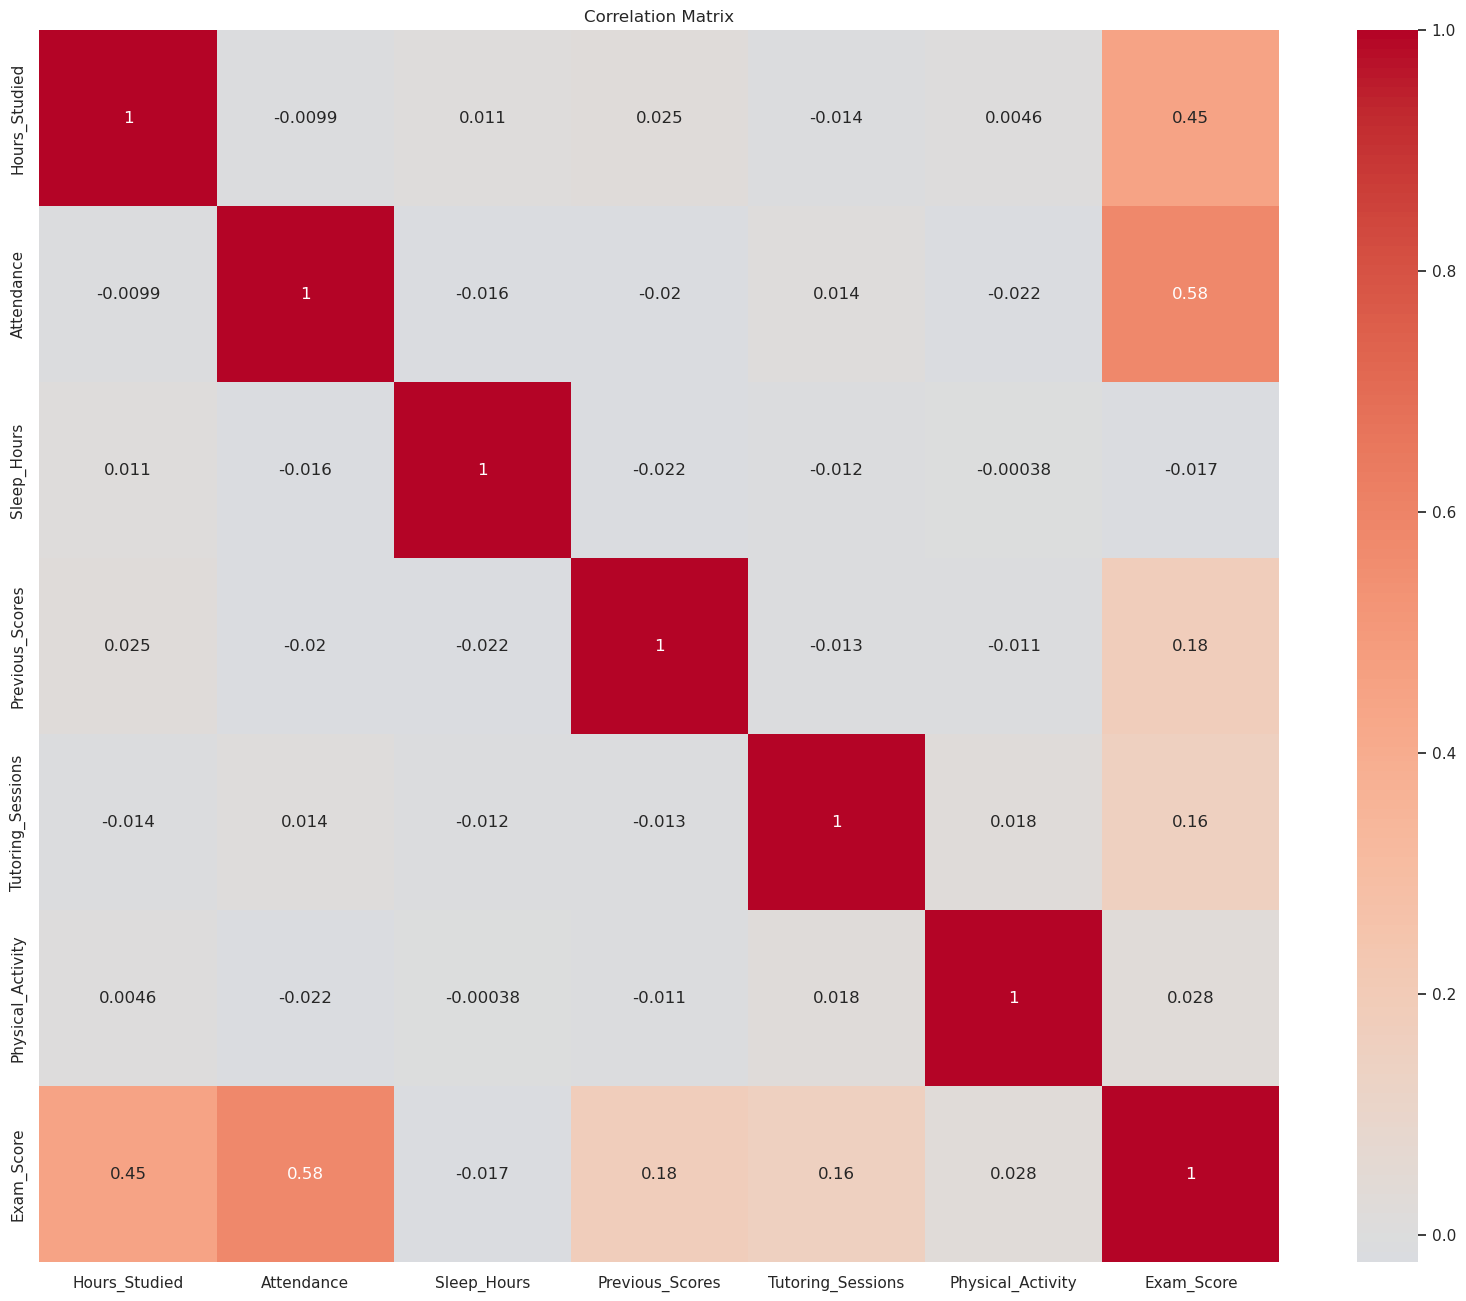

In [95]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [96]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

Attendance         Exam_Score           0.581072
Hours_Studied      Exam_Score           0.445455
Previous_Scores    Exam_Score           0.175079
Tutoring_Sessions  Exam_Score           0.156525
Physical_Activity  Exam_Score           0.027824
Hours_Studied      Previous_Scores      0.024846
Tutoring_Sessions  Physical_Activity    0.017733
Attendance         Tutoring_Sessions    0.014324
Hours_Studied      Sleep_Hours          0.010977
                   Physical_Activity    0.004624
dtype: float64

In [97]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

Hours_Studied    Attendance          -0.009908
Previous_Scores  Physical_Activity   -0.011274
Sleep_Hours      Tutoring_Sessions   -0.012216
Previous_Scores  Tutoring_Sessions   -0.013122
Hours_Studied    Tutoring_Sessions   -0.014282
Attendance       Sleep_Hours         -0.015918
Sleep_Hours      Exam_Score          -0.017022
Attendance       Previous_Scores     -0.020186
Sleep_Hours      Previous_Scores     -0.021750
Attendance       Physical_Activity   -0.022435
dtype: float64

In [98]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

Exam_Score         Attendance           0.581072
                   Hours_Studied        0.445455
                   Previous_Scores      0.175079
                   Tutoring_Sessions    0.156525
                   Physical_Activity    0.027824
Previous_Scores    Hours_Studied        0.024846
Physical_Activity  Tutoring_Sessions    0.017733
Tutoring_Sessions  Attendance           0.014324
Sleep_Hours        Hours_Studied        0.010977
Physical_Activity  Hours_Studied        0.004624
                   Sleep_Hours         -0.000378
Attendance         Hours_Studied       -0.009908
Physical_Activity  Previous_Scores     -0.011274
Tutoring_Sessions  Sleep_Hours         -0.012216
                   Previous_Scores     -0.013122
dtype: float64


In [99]:
# top_pairs = [pair for pair in sorted_pairs.index]
# variables = set([var for pair in top_pairs for var in pair])
# sns.pairplot(data, vars=list(variables), kind='reg', diag_kind='kde')
# plt.suptitle('Pairplot for Top Correlated Pairs', y=1.02)
# plt.show()

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]
variables = set([var for pair in top_pairs for var in pair])

In [100]:
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
# Set color stuff i change change lng and map values kay ugly

def color_data(c_key):
    color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
    colors = None   # No color mapping in case invalid ang c_key
    if c_key in data.keys():
        if c_key in ENUMDATA:
            colors = data[c_key].map(color_map) # if data is enum get colors from map
        else:
            colors = c_key                      # if data already numerical get colors from gradient
    return colors

Slope: 0.28929062860968324       Intercept: 61.45698360950434


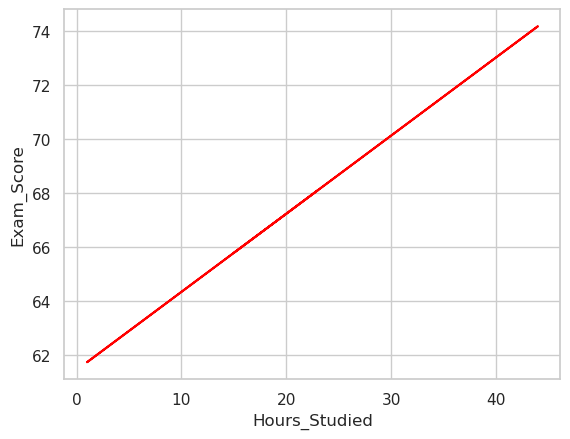

In [101]:
# Visualization Scatter Plot with Regresion
y_key = "Exam_Score"
c_key = "Gender"
x_key = "Hours_Studied"

#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=color_data(c_key))

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: 0.0007960504026209089       Intercept: 2.9517087416397962


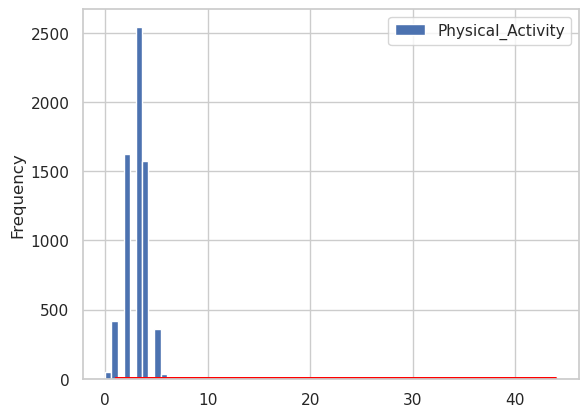

In [102]:
# Visualization Scatter Plot with Regresion
y_key = "Physical_Activity"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

In [105]:
# # Visualization Scatter Plot with Regresion
# y_key = "Parental_Involvement"
# c_key = "Attendance"
# x_key = "Hours_Studied"


# #Draw Scatter Plot
# data.plot(kind="hist",x=x_key,y=y_key)

# #Get Slope and Intercept
# slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
# print(f"Slope: {slope}       Intercept: {intercept}")

# #Draw Regression
# plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

<Figure size 800x600 with 0 Axes>

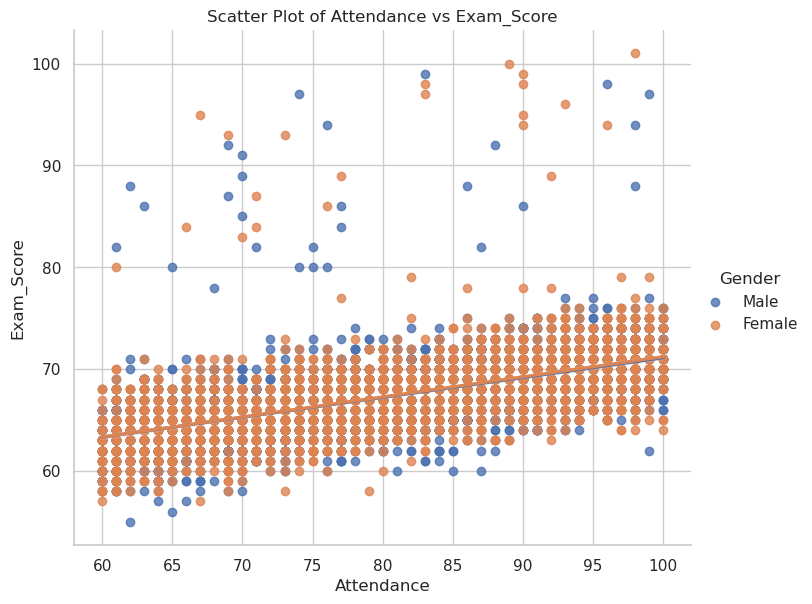

<Figure size 800x600 with 0 Axes>

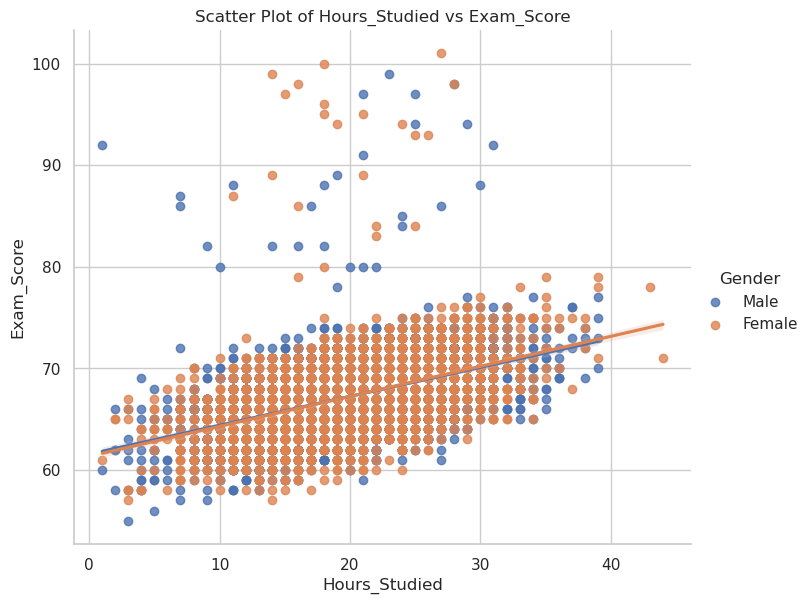

<Figure size 800x600 with 0 Axes>

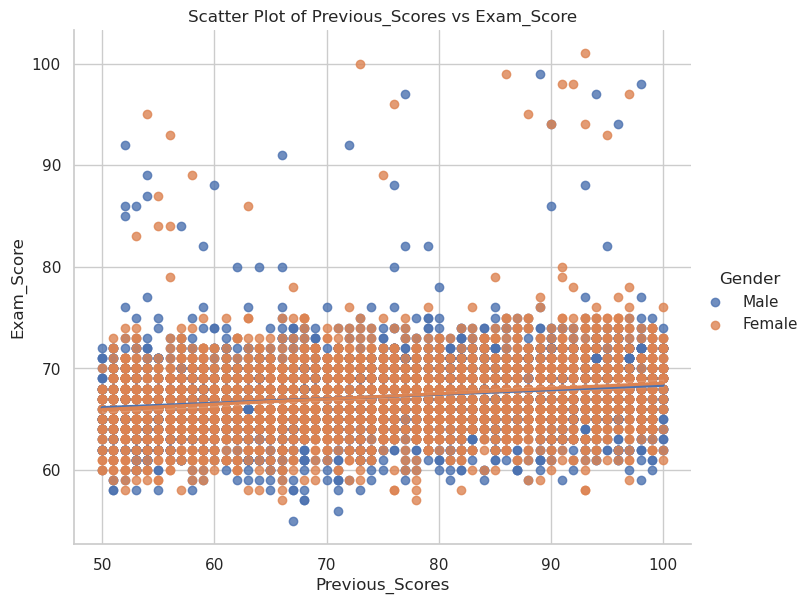

<Figure size 800x600 with 0 Axes>

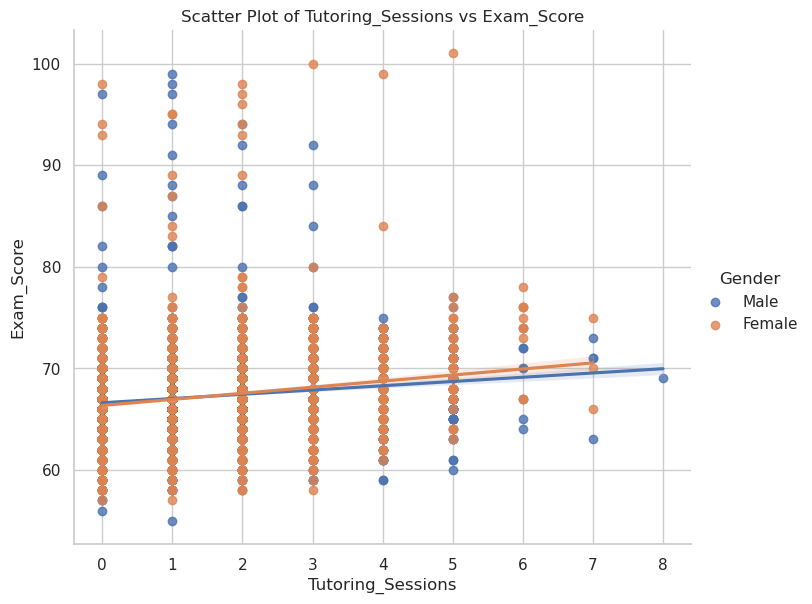

<Figure size 800x600 with 0 Axes>

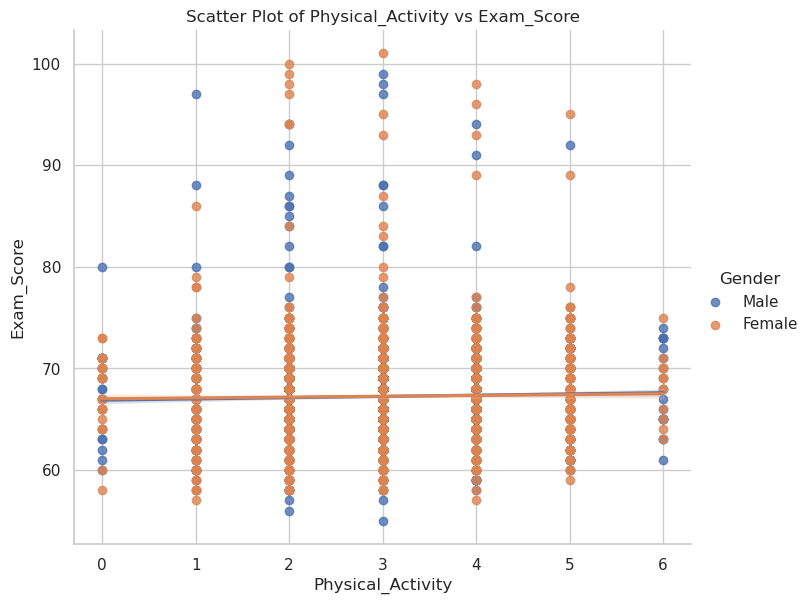

<Figure size 800x600 with 0 Axes>

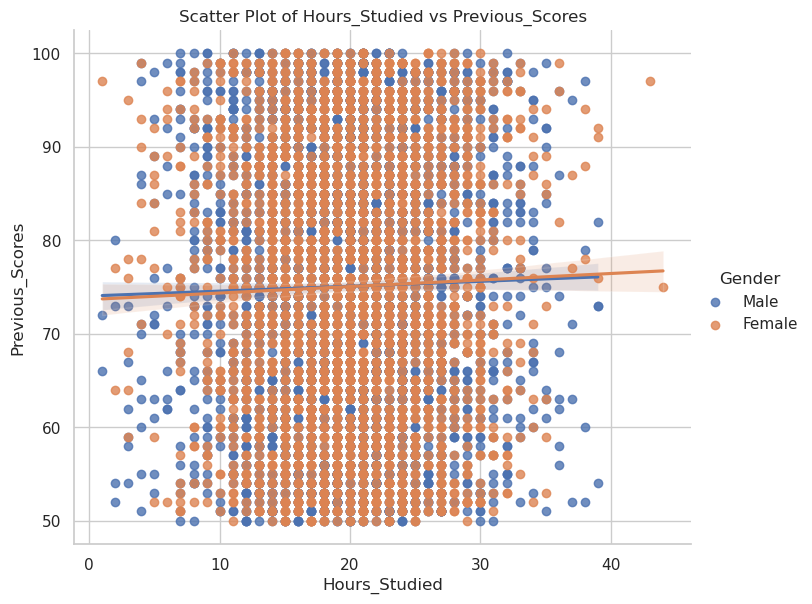

<Figure size 800x600 with 0 Axes>

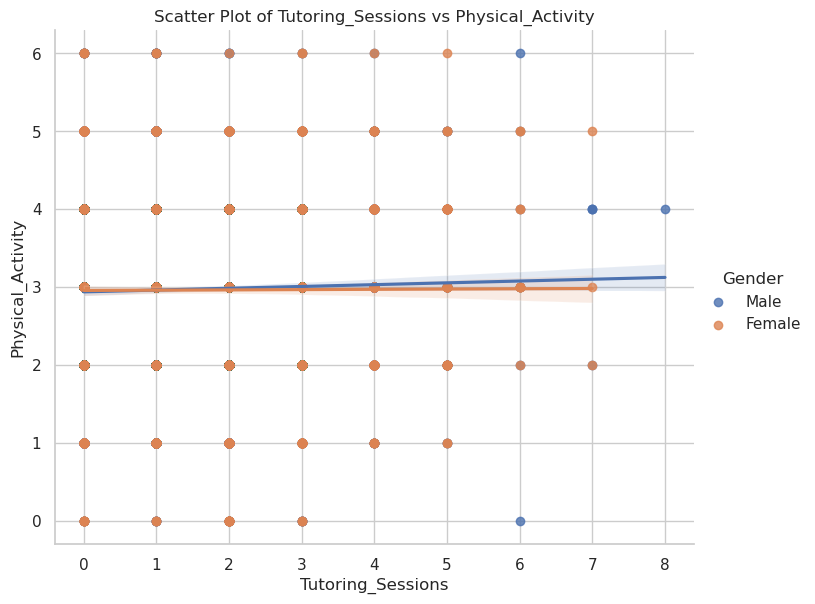

<Figure size 800x600 with 0 Axes>

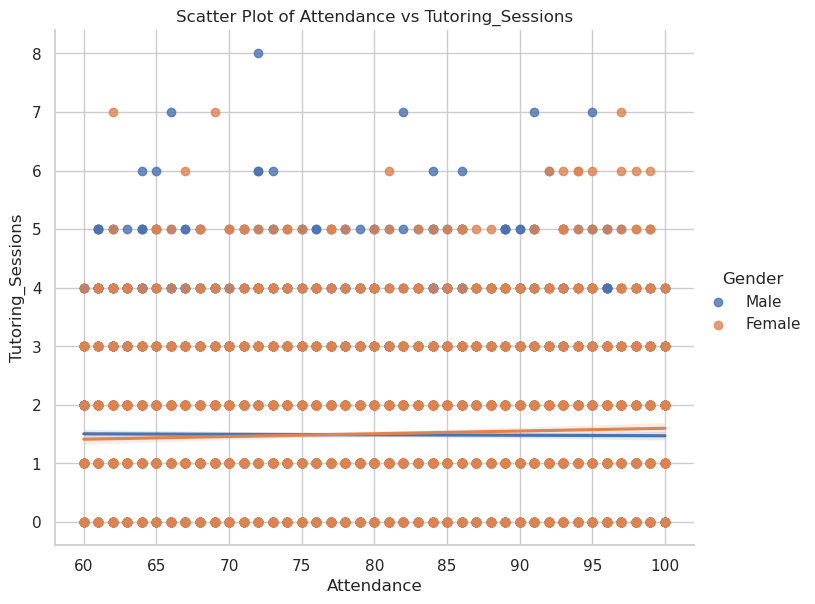

<Figure size 800x600 with 0 Axes>

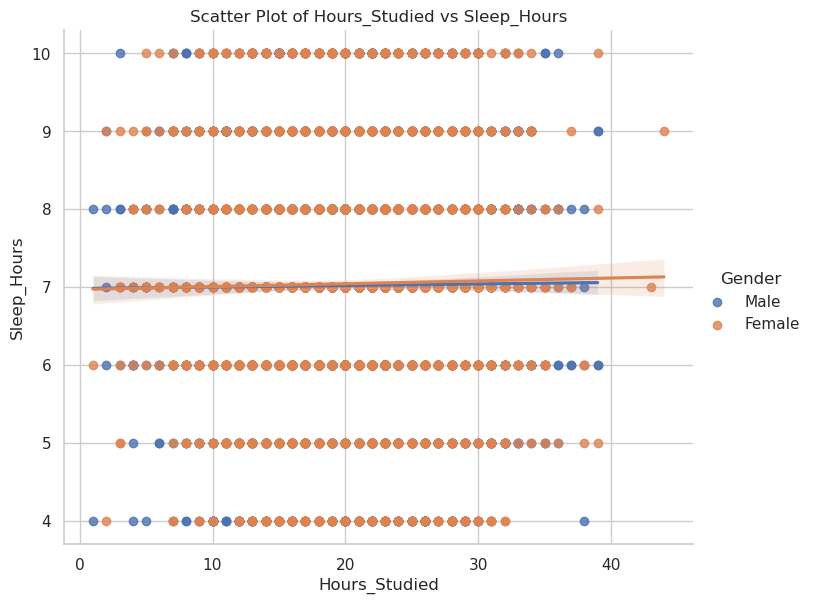

<Figure size 800x600 with 0 Axes>

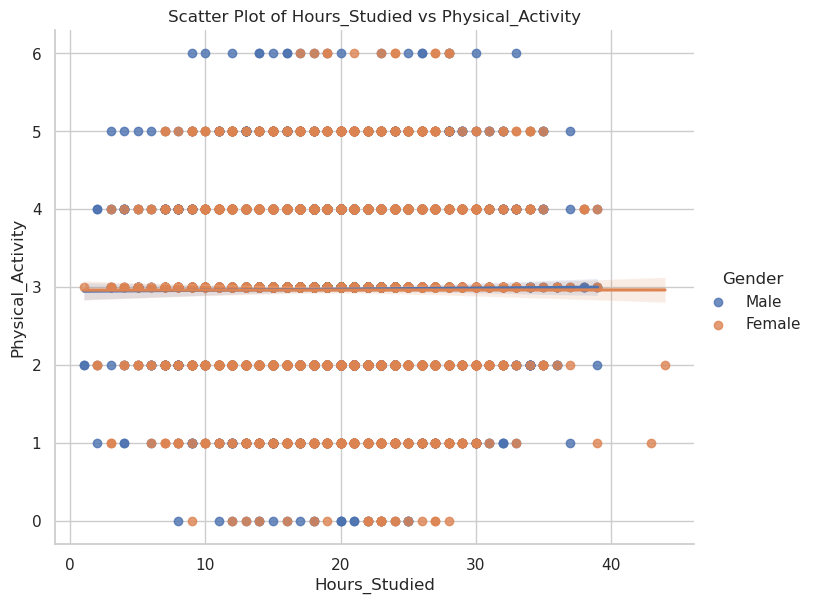

<Figure size 800x600 with 0 Axes>

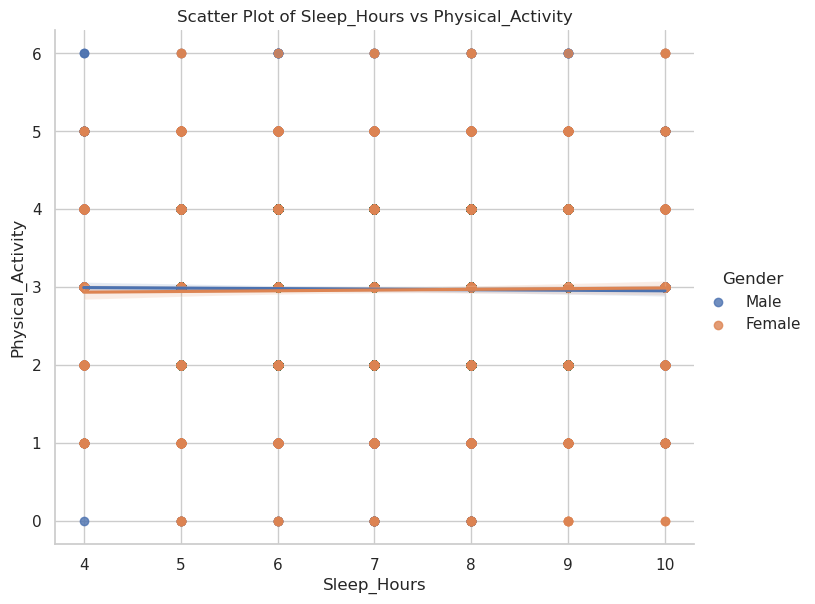

<Figure size 800x600 with 0 Axes>

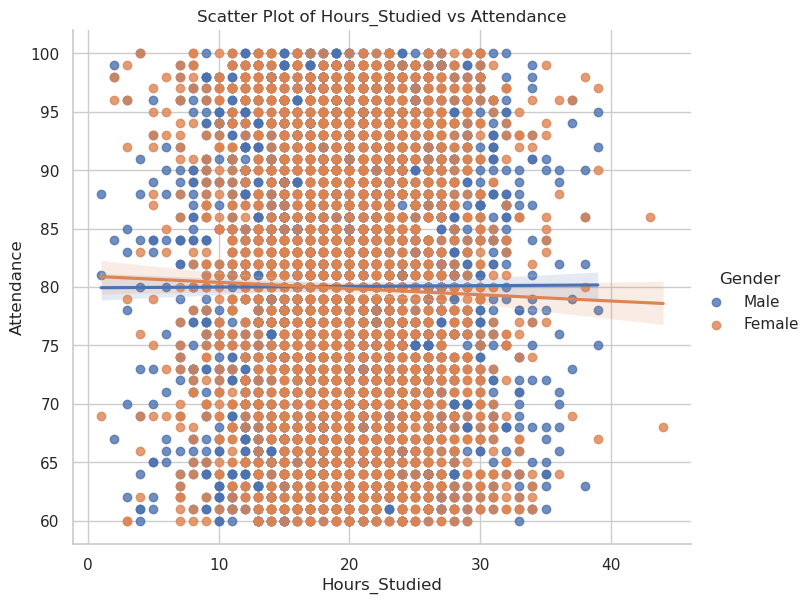

<Figure size 800x600 with 0 Axes>

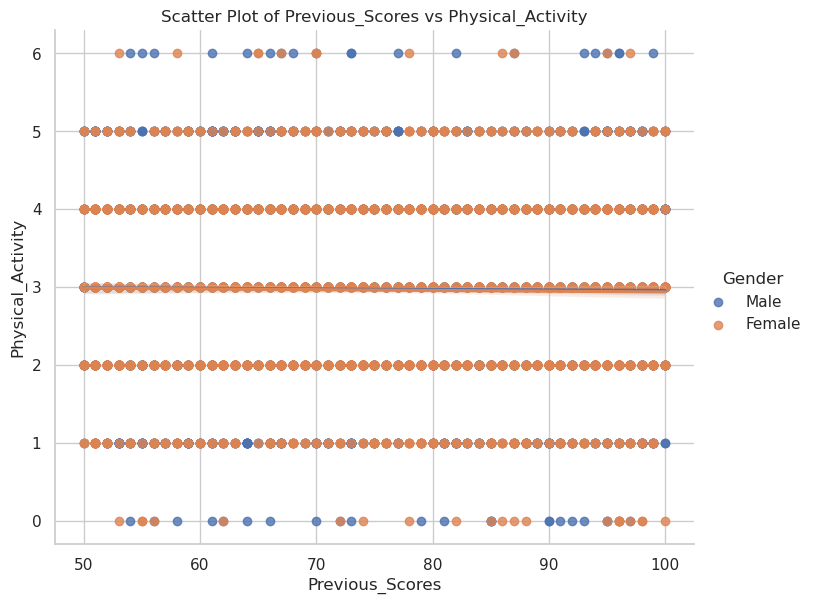

<Figure size 800x600 with 0 Axes>

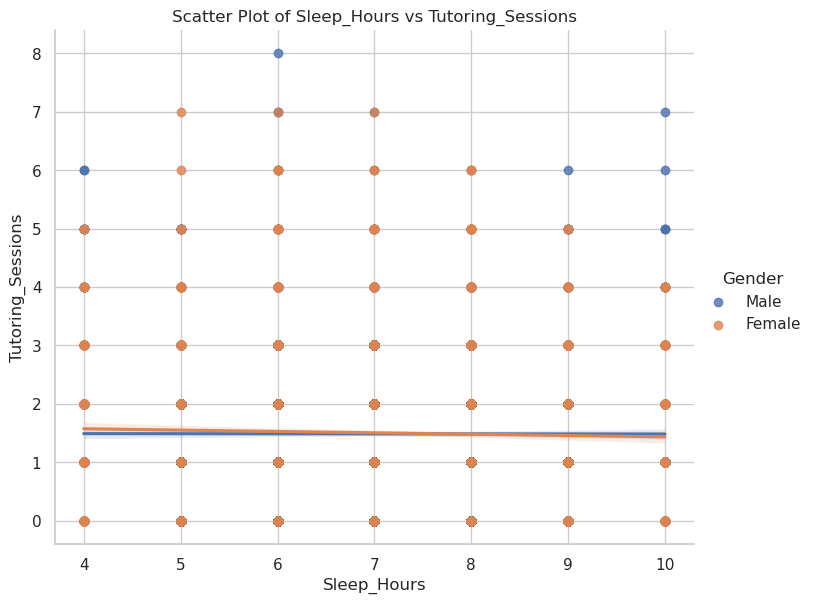

<Figure size 800x600 with 0 Axes>

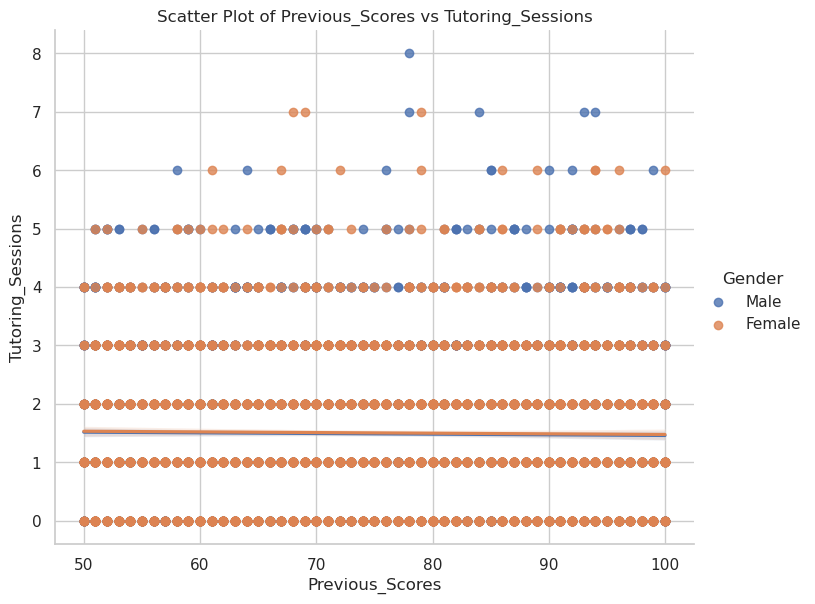

In [107]:

# column to use for coloring the scatter plots
hue_column = 'Gender'

# create scatter plots with regression lines for each pair
for (var2, var1) in top_pairs:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

<Figure size 800x600 with 0 Axes>

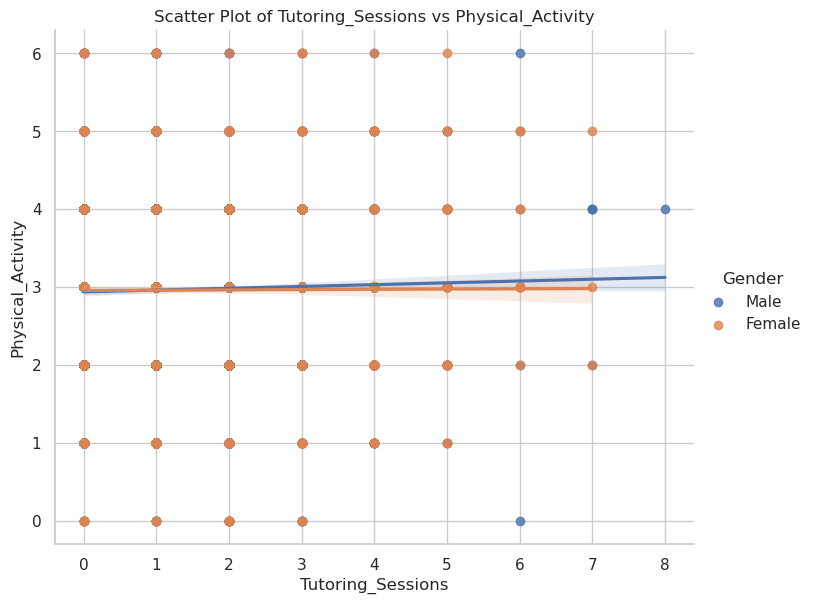

<Figure size 800x600 with 0 Axes>

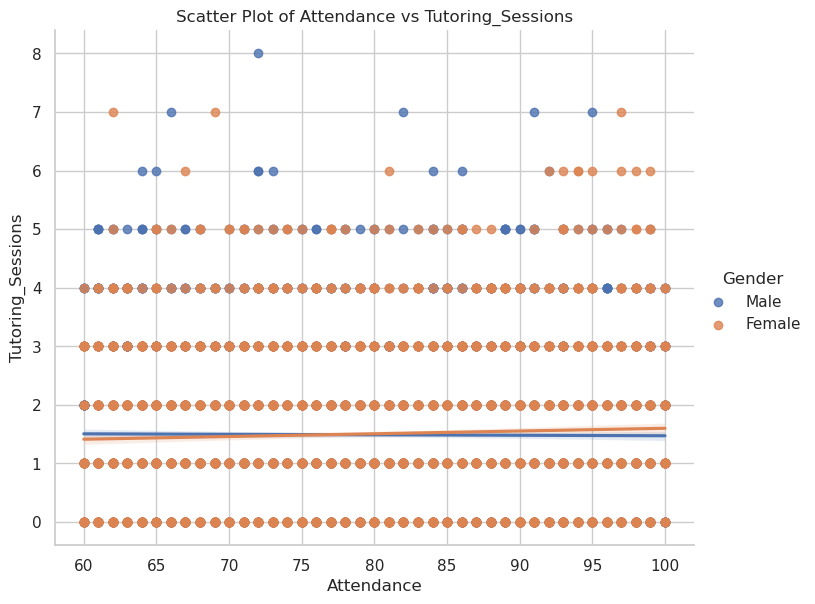

<Figure size 800x600 with 0 Axes>

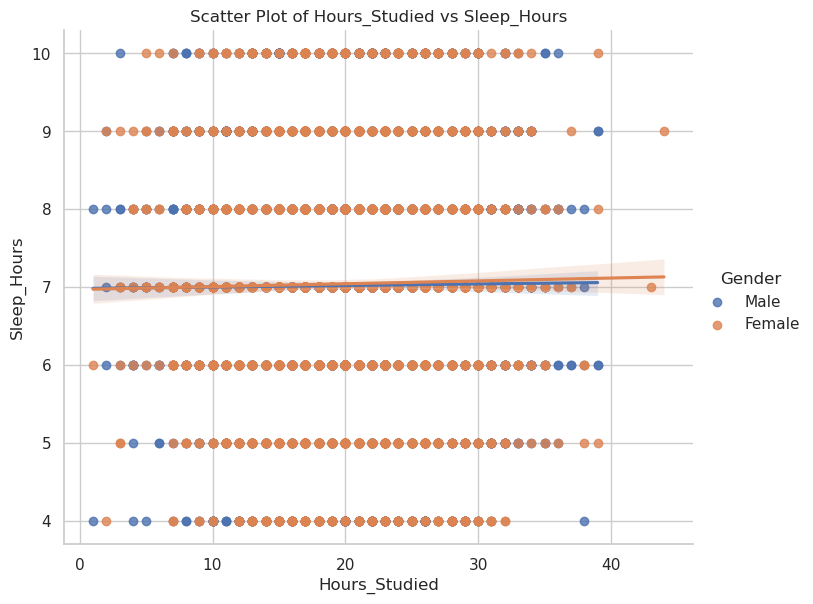

<Figure size 800x600 with 0 Axes>

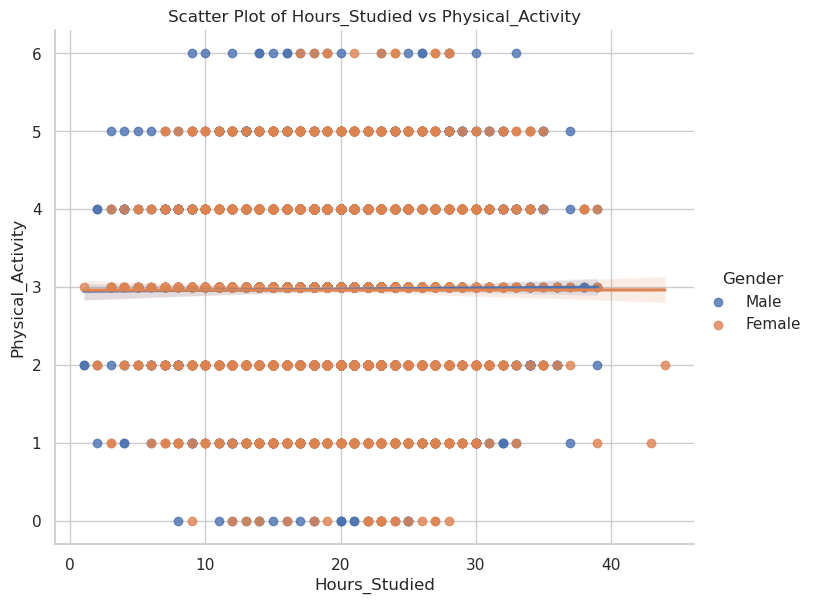

<Figure size 800x600 with 0 Axes>

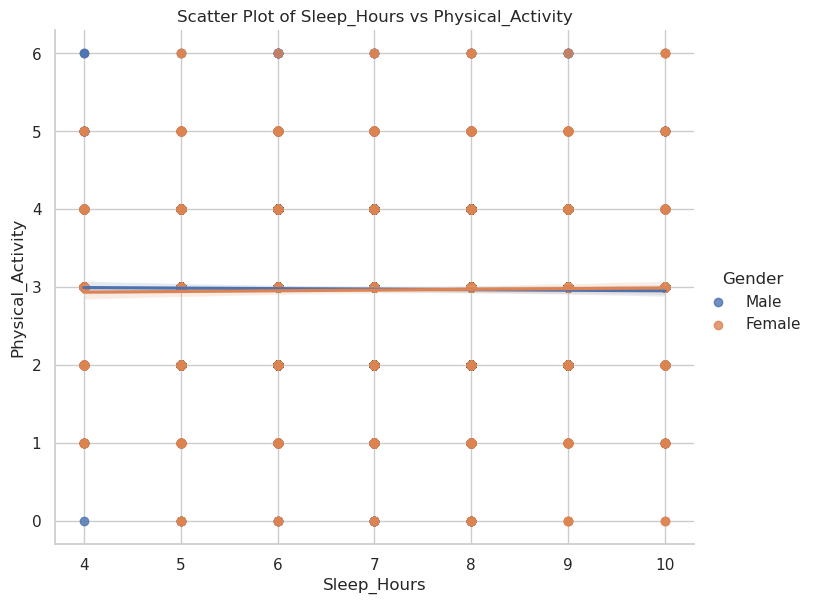

<Figure size 800x600 with 0 Axes>

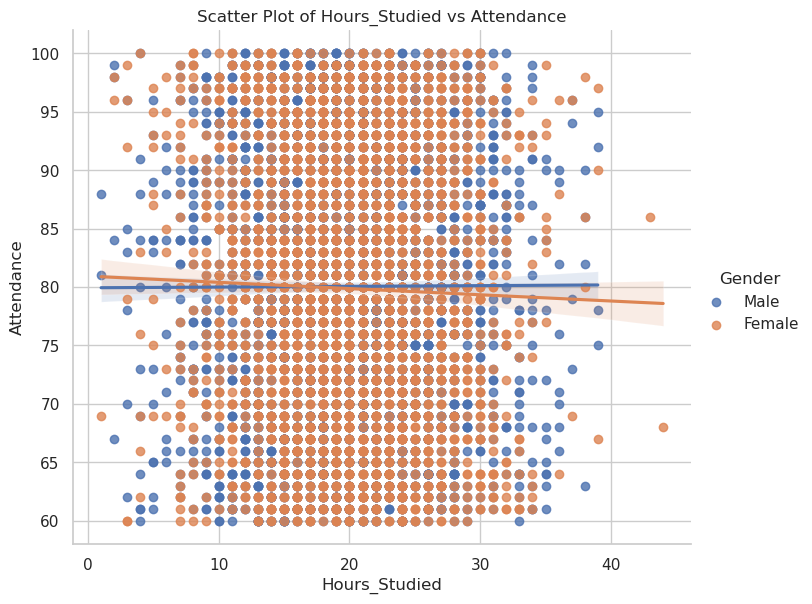

<Figure size 800x600 with 0 Axes>

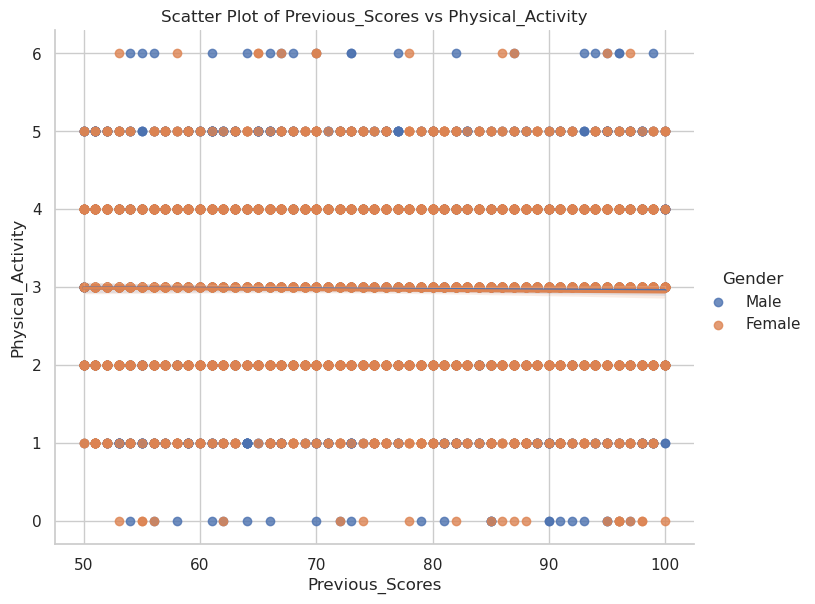

<Figure size 800x600 with 0 Axes>

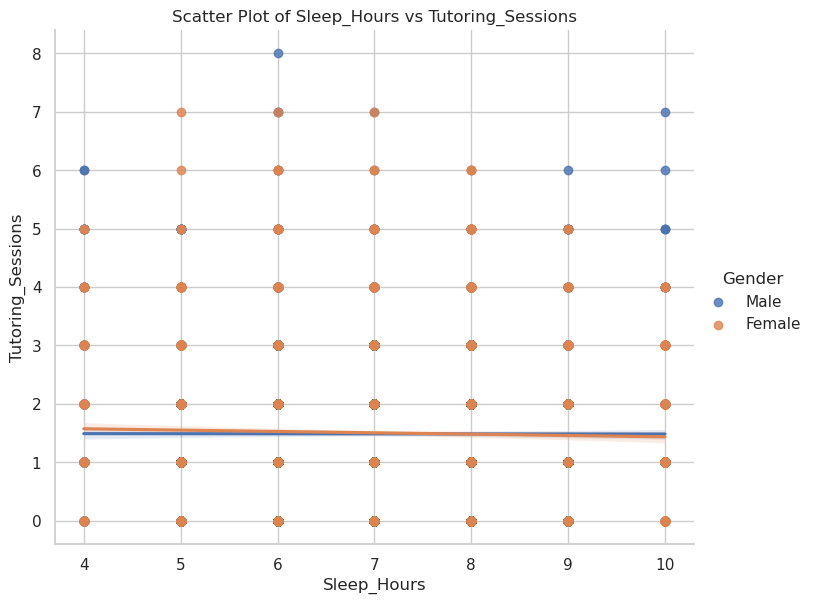

<Figure size 800x600 with 0 Axes>

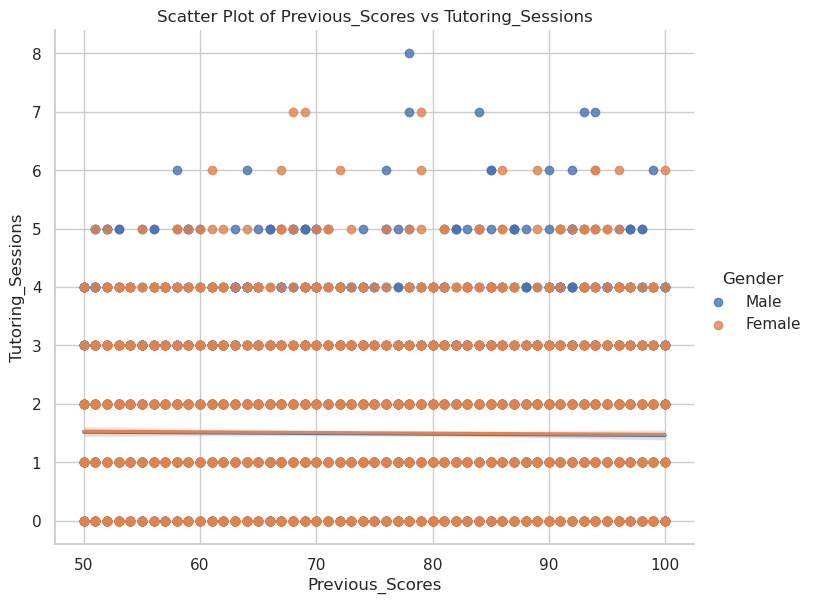

<Figure size 800x600 with 0 Axes>

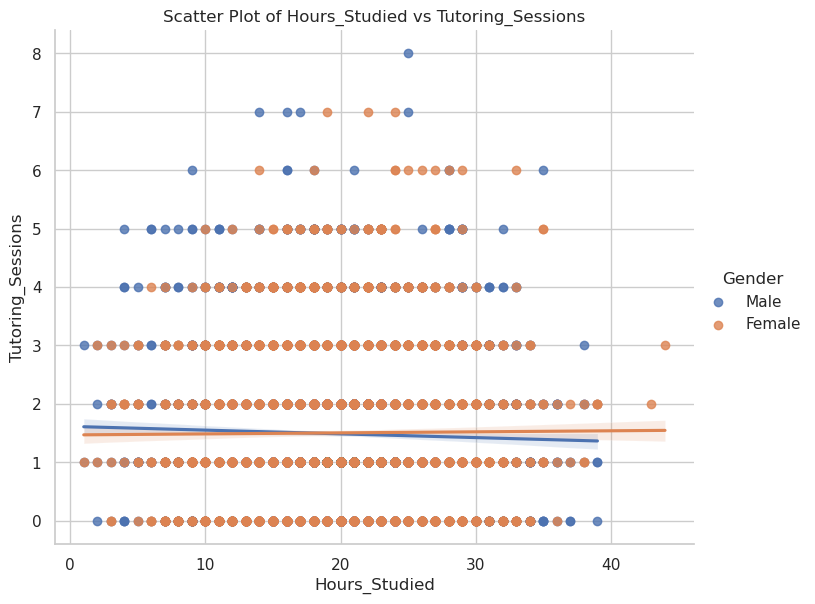

<Figure size 800x600 with 0 Axes>

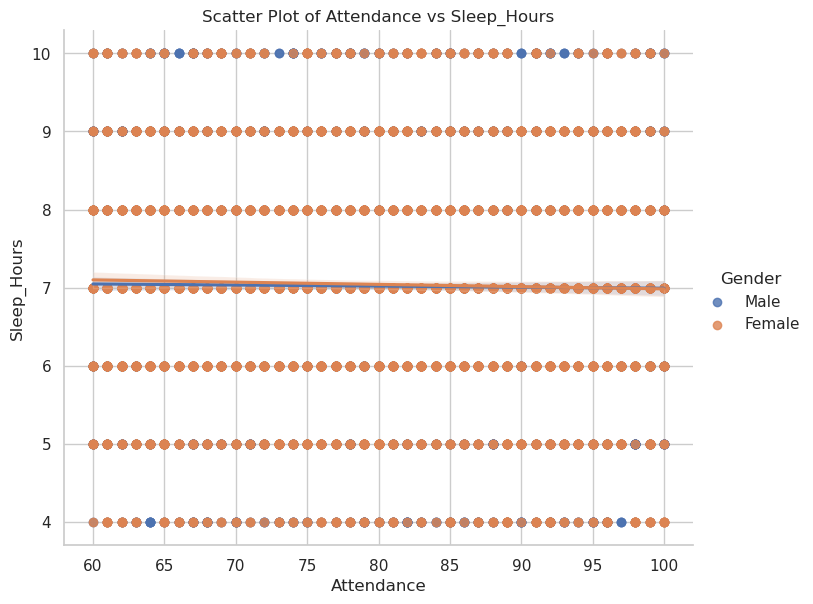

<Figure size 800x600 with 0 Axes>

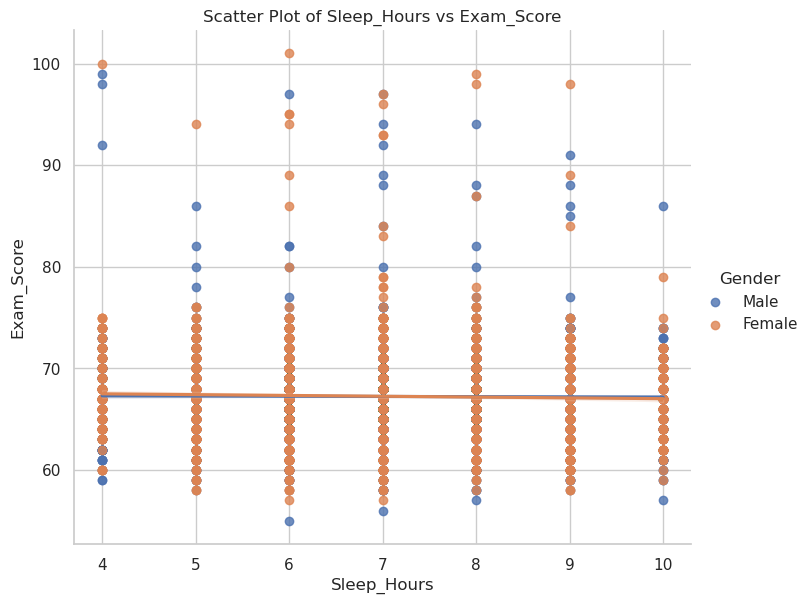

<Figure size 800x600 with 0 Axes>

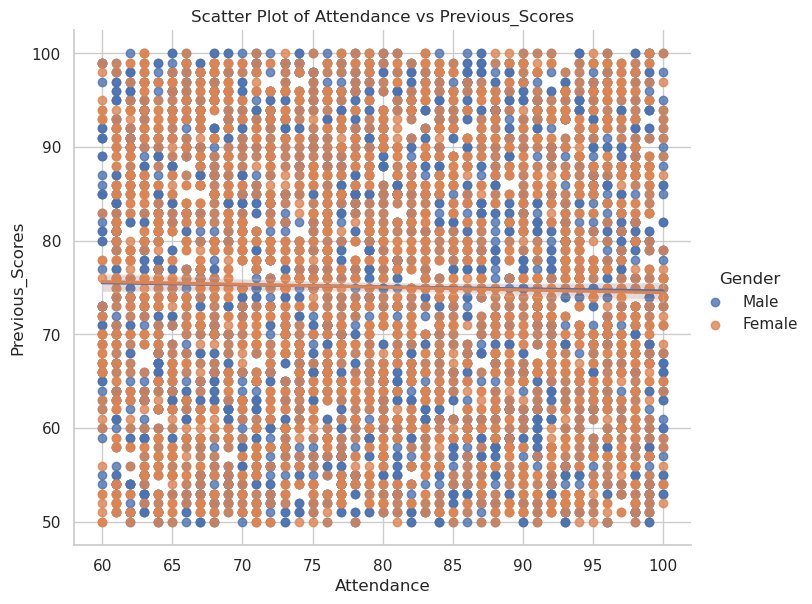

<Figure size 800x600 with 0 Axes>

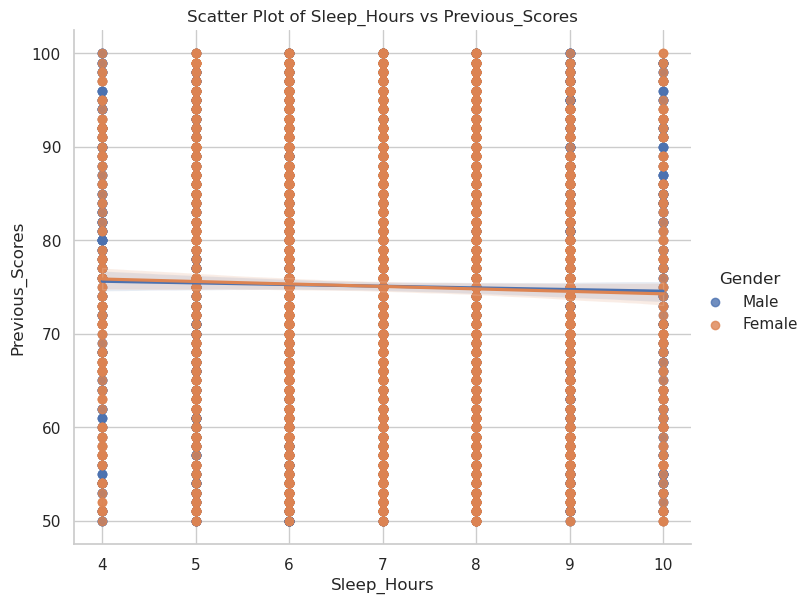

<Figure size 800x600 with 0 Axes>

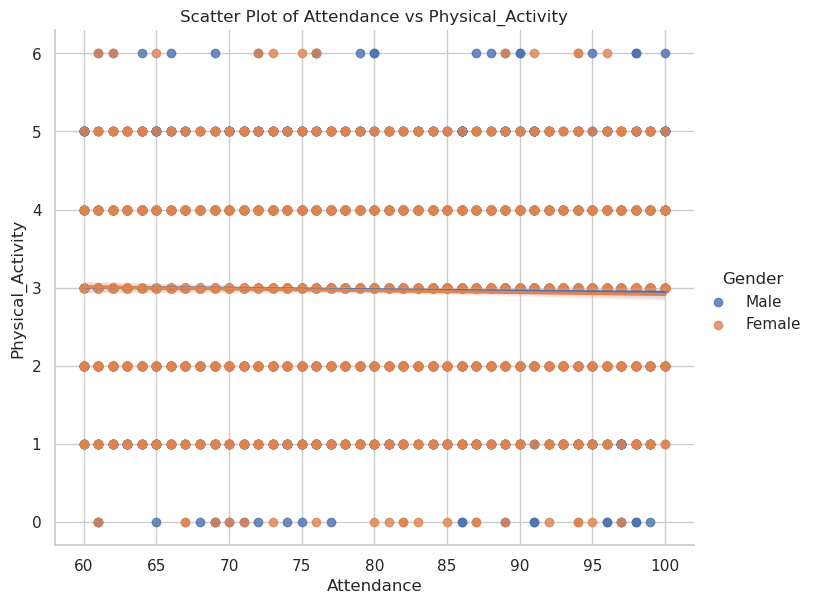

In [108]:
# column to use for coloring the scatter plots
hue_column = 'Gender'

# create scatter plots with regression lines for each pair
for (var2, var1) in inv_top_pairs:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

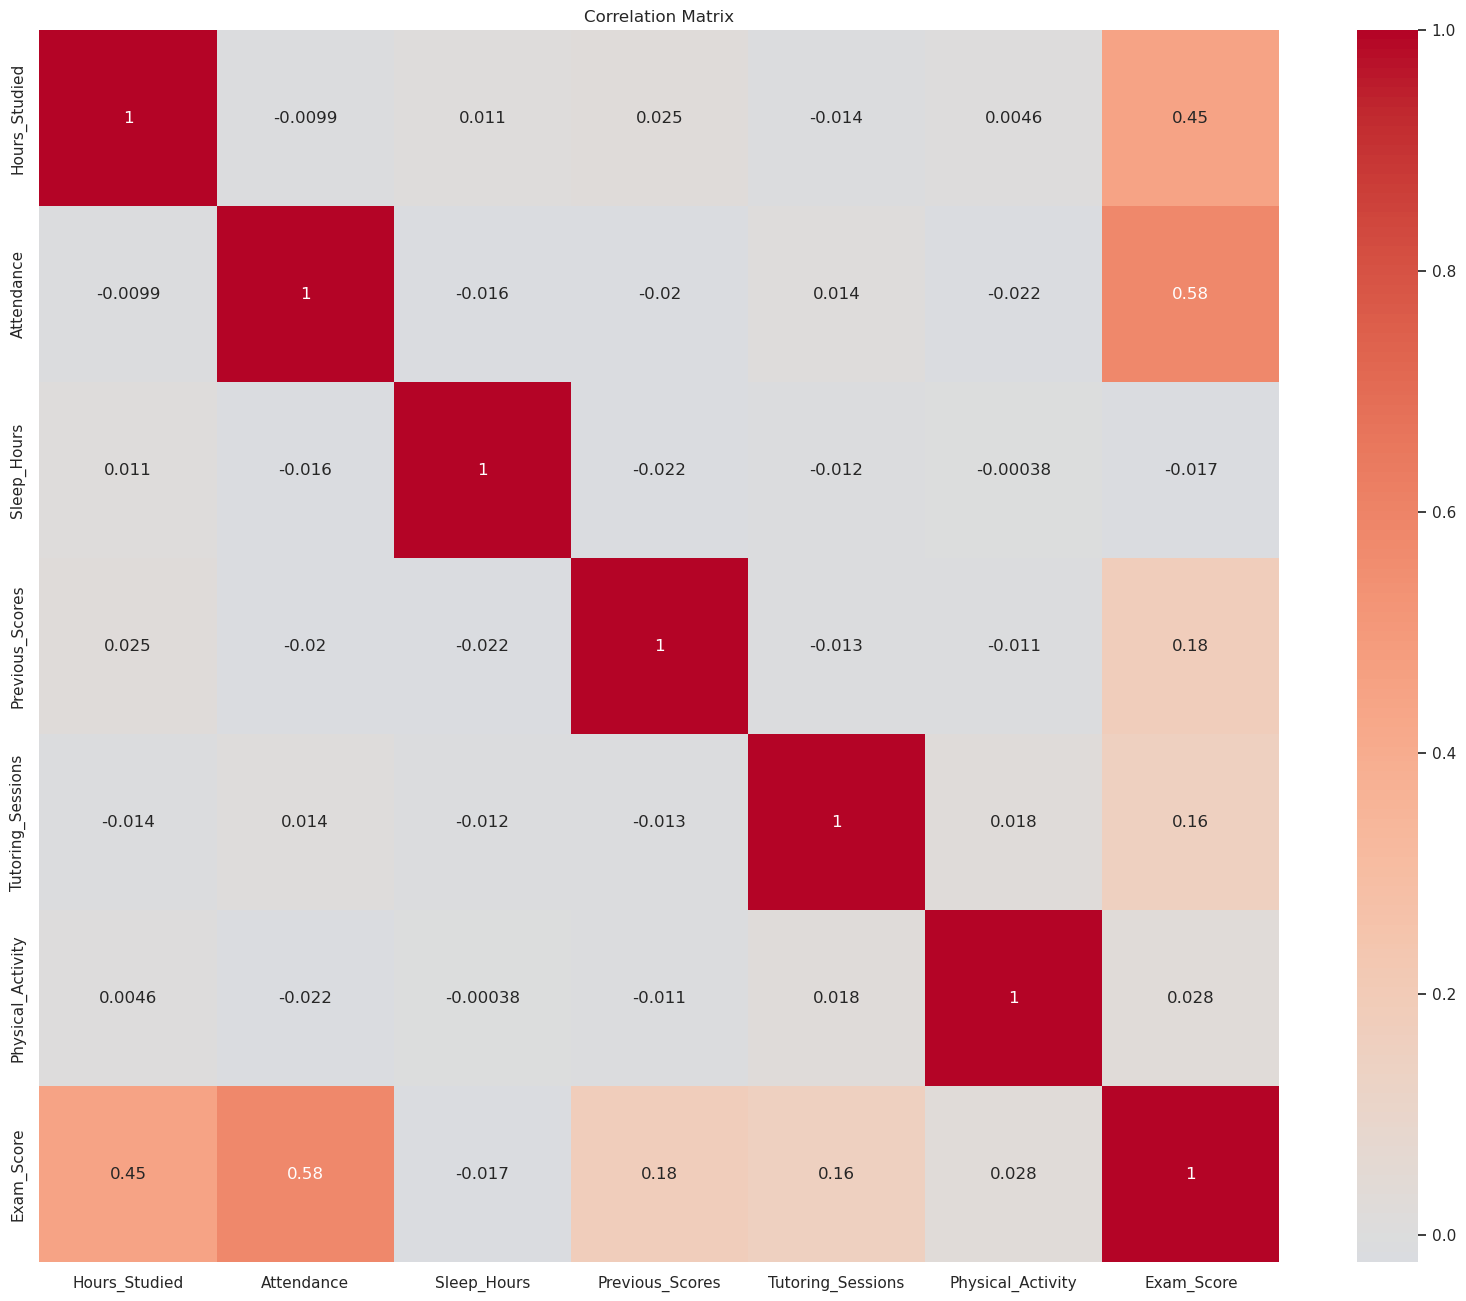

In [110]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [111]:
# # Correlation Matrix ( Numeric Only )
# corr_matrix = data.corr(numeric_only=False)

# # Create a heatmap
# plt.figure(figsize=np.array((10, 8)) * 2)
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()


ValueError: could not convert string to float: 'Low'

<Figure size 800x600 with 0 Axes>

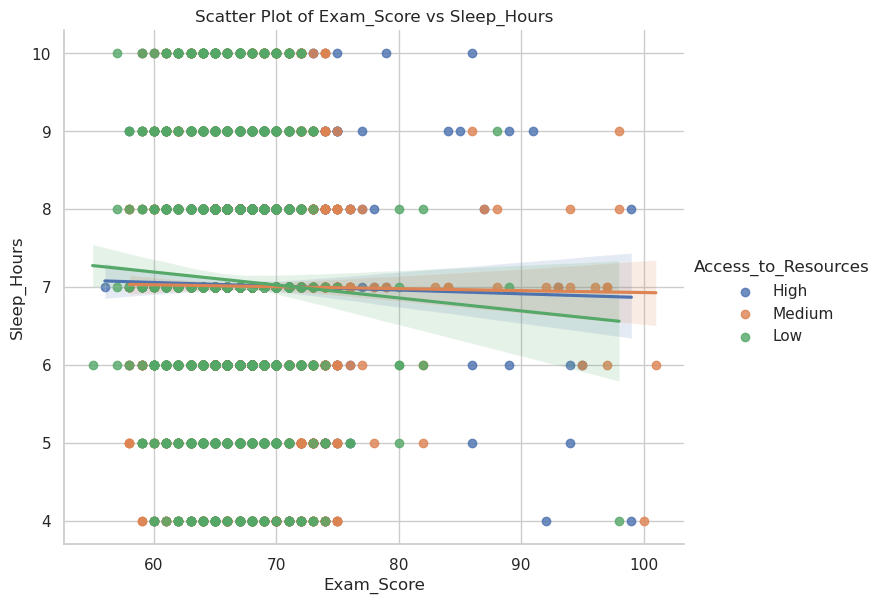

In [113]:
# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create scatter plots with regression lines for each pair
for (var2, var1) in [("Sleep_Hours", "Exam_Score")]:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

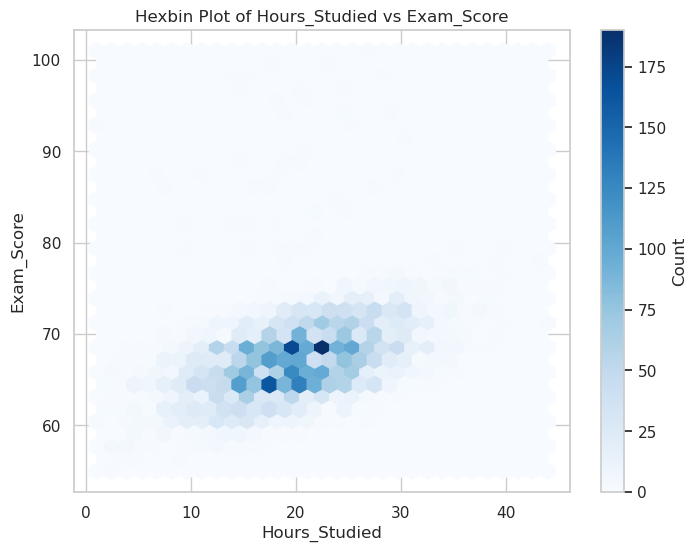

In [114]:

# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create hexbin plots for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    plt.hexbin(data[var1], data[var2], gridsize=30, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title(f'Hexbin Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

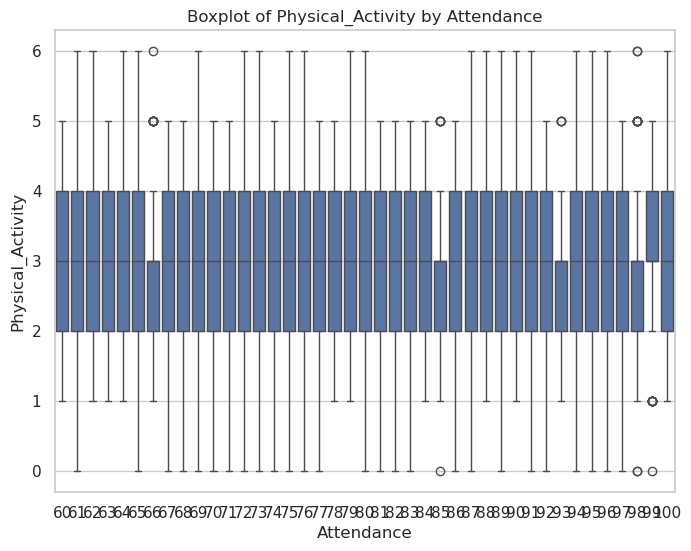

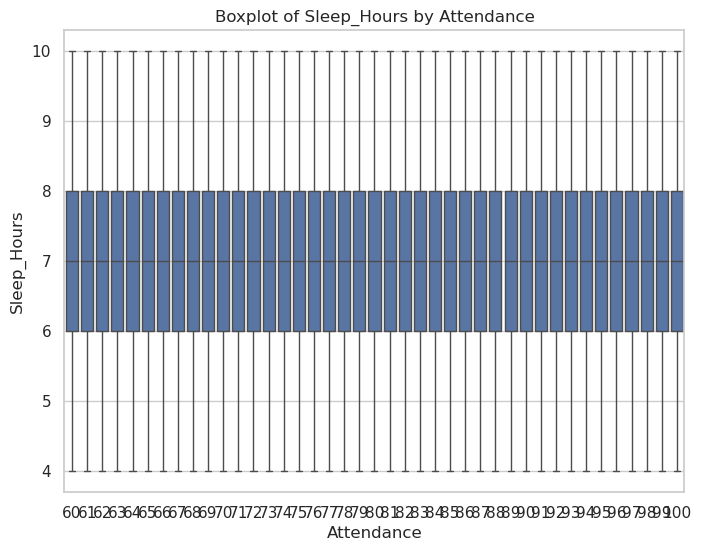

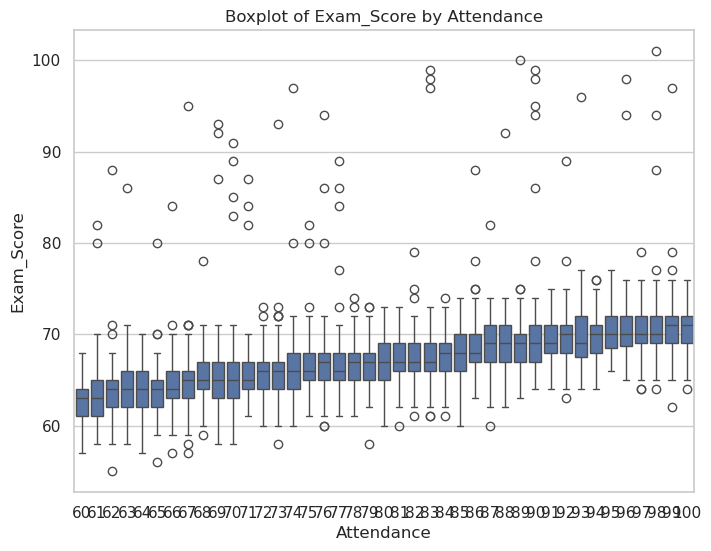

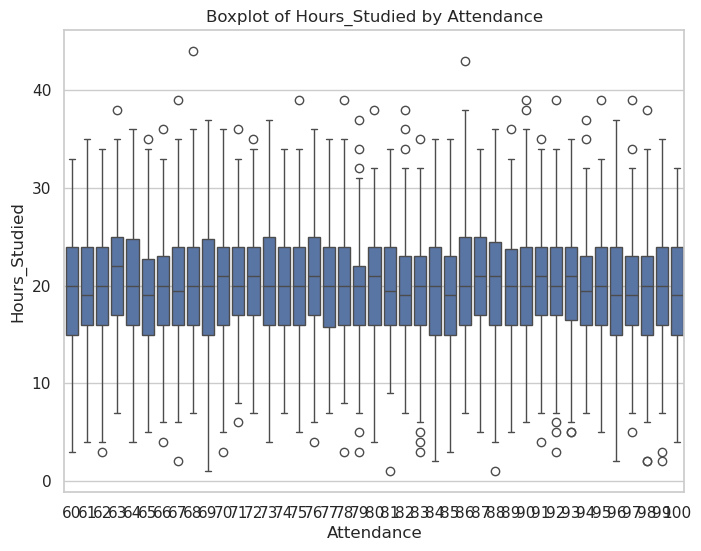

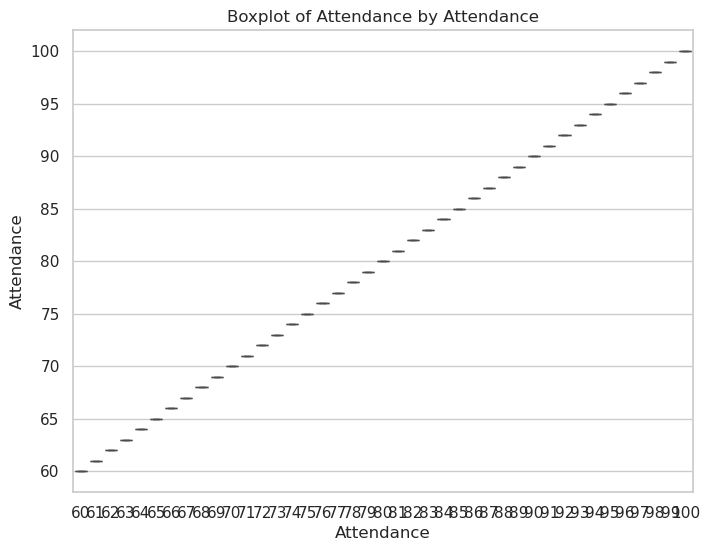

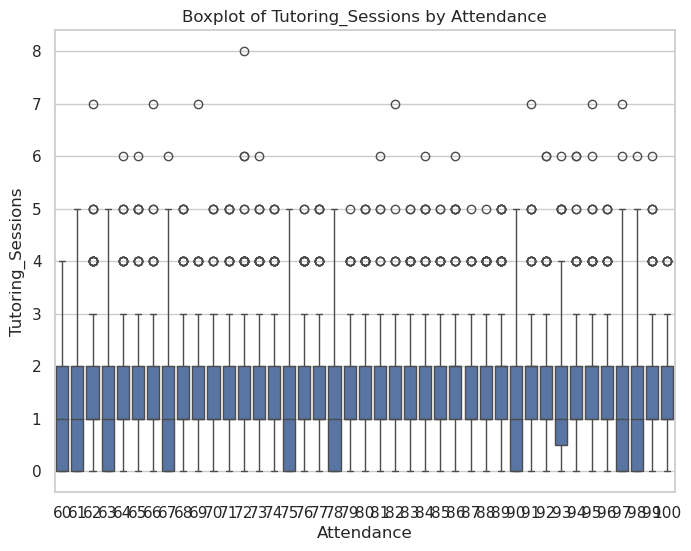

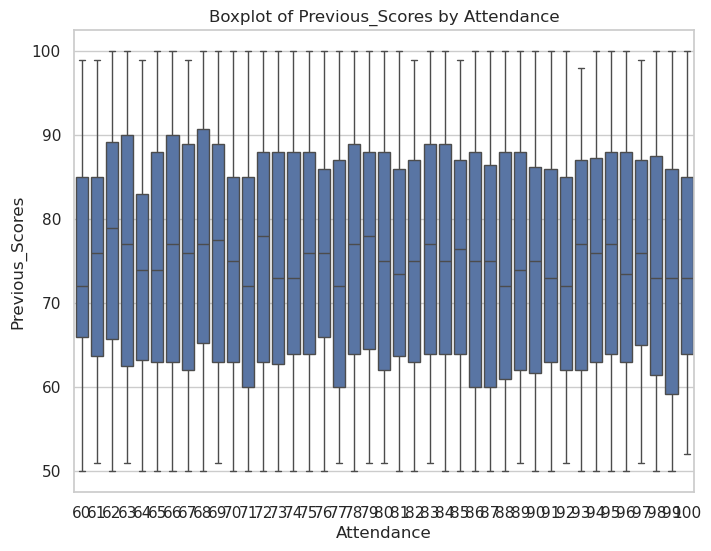

In [115]:
# 4. Boxplots for Key Variables by Category (e.g., Gender)
hue_column = 'Attendance'  # Change this to the column you want to use for coloring
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=hue_column, y=var)
    plt.title(f'Boxplot of {var} by {hue_column}')
    plt.xlabel(hue_column)
    plt.ylabel(var)
    plt.show()


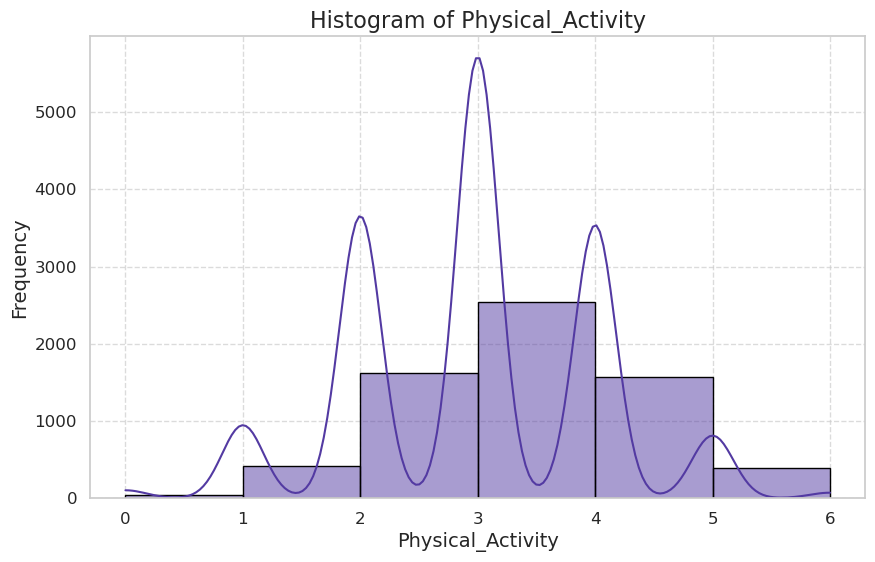

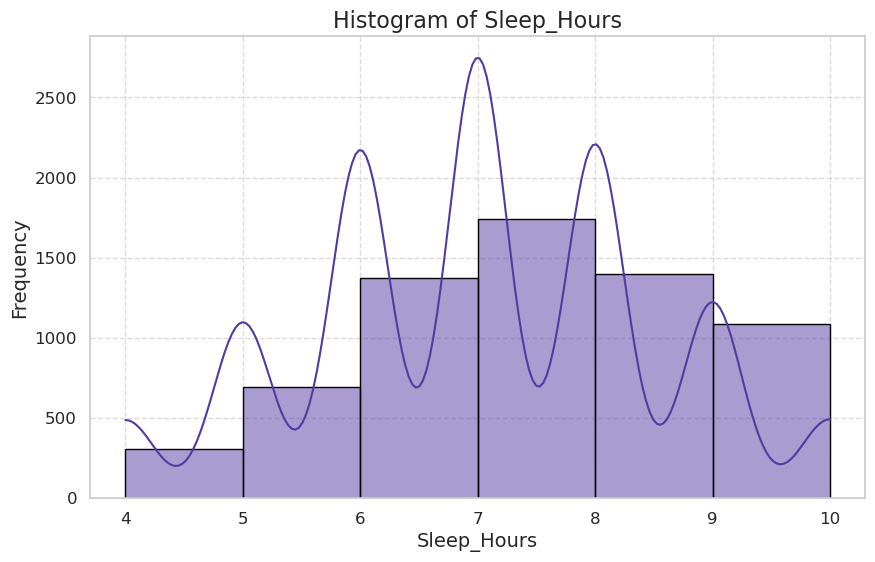

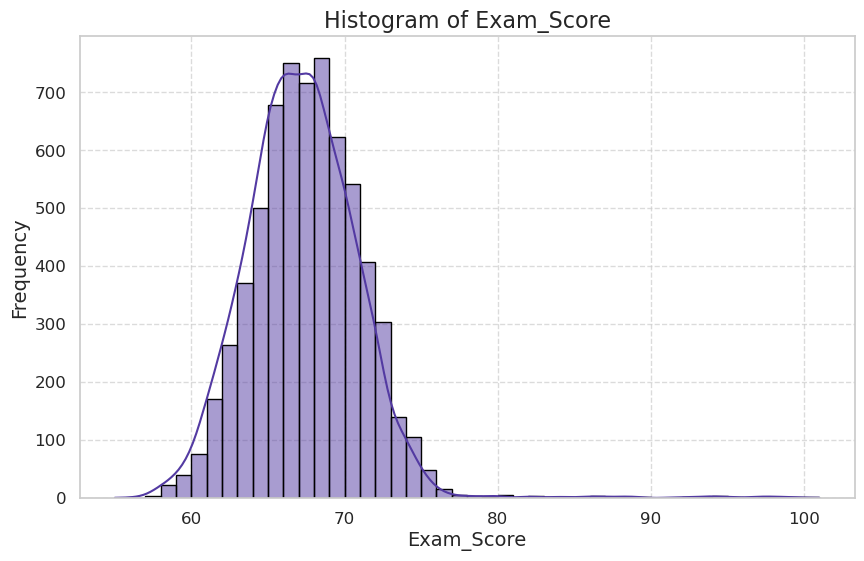

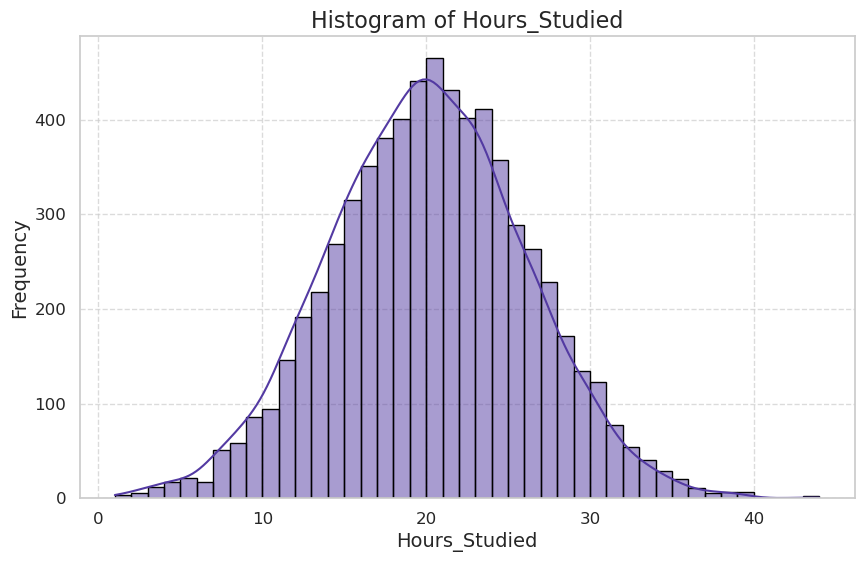

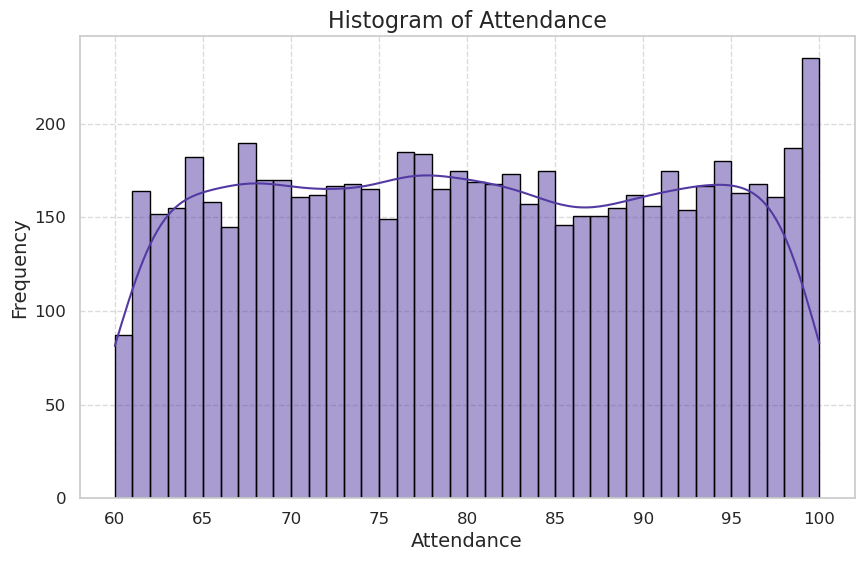

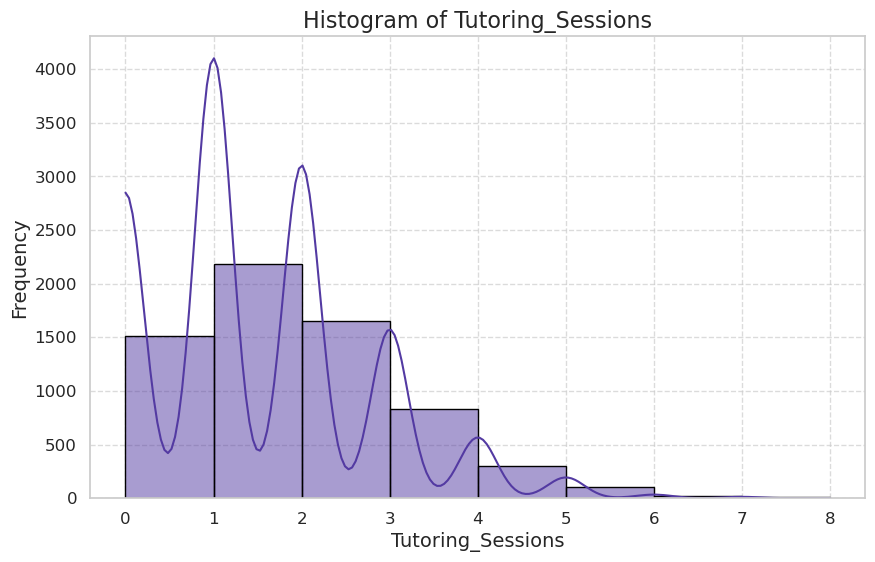

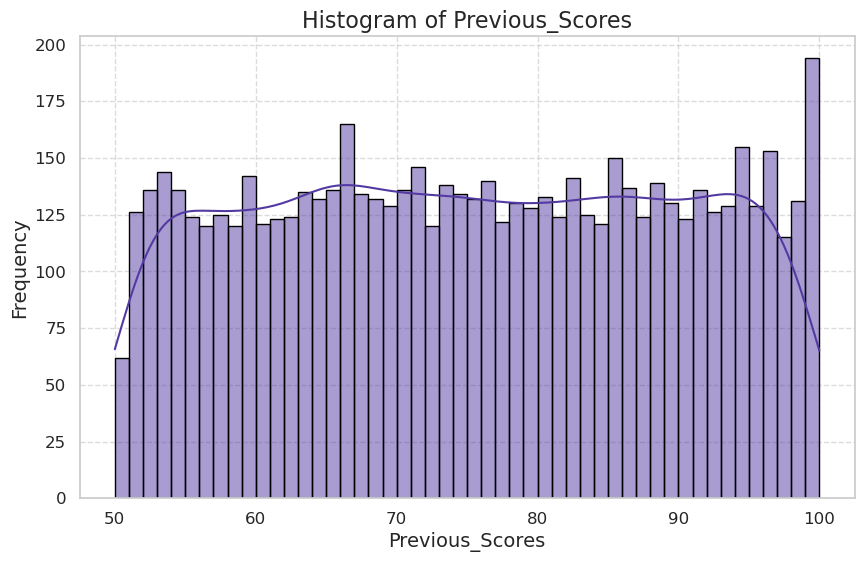

In [116]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create histograms for each variable in the top correlated pairs

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, kde=True, binwidth=1, color='#533aa2', edgecolor='black')
    plt.title(f'Histogram of {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Average Exam_Score by Attendance:
    Attendance  Exam_Score
0           60   62.413793
1           61   63.384146
2           62   63.756579
3           63   64.361290
4           64   63.884615
5           65   63.905063
6           66   64.537931
7           67   64.626316
8           68   65.147059
9           69   65.123529
10          70   65.527950
11          71   65.611111
12          72   65.694611
13          73   65.952381
14          74   66.272727
15          75   66.288591
16          76   66.886486
17          77   66.668478
18          78   66.890909
19          79   66.828571
20          80   67.088757
21          81   67.232143
22          82   67.341040
23          83   67.968153
24          84   67.742857
25          85   67.883562
26          86   68.655629
27          87   68.741722
28          88   68.909677
29          89   69.104938
30          90   70.012821
31          91   69.417143
32          92   69.727273
33          93   69.820359
34          94   69.5

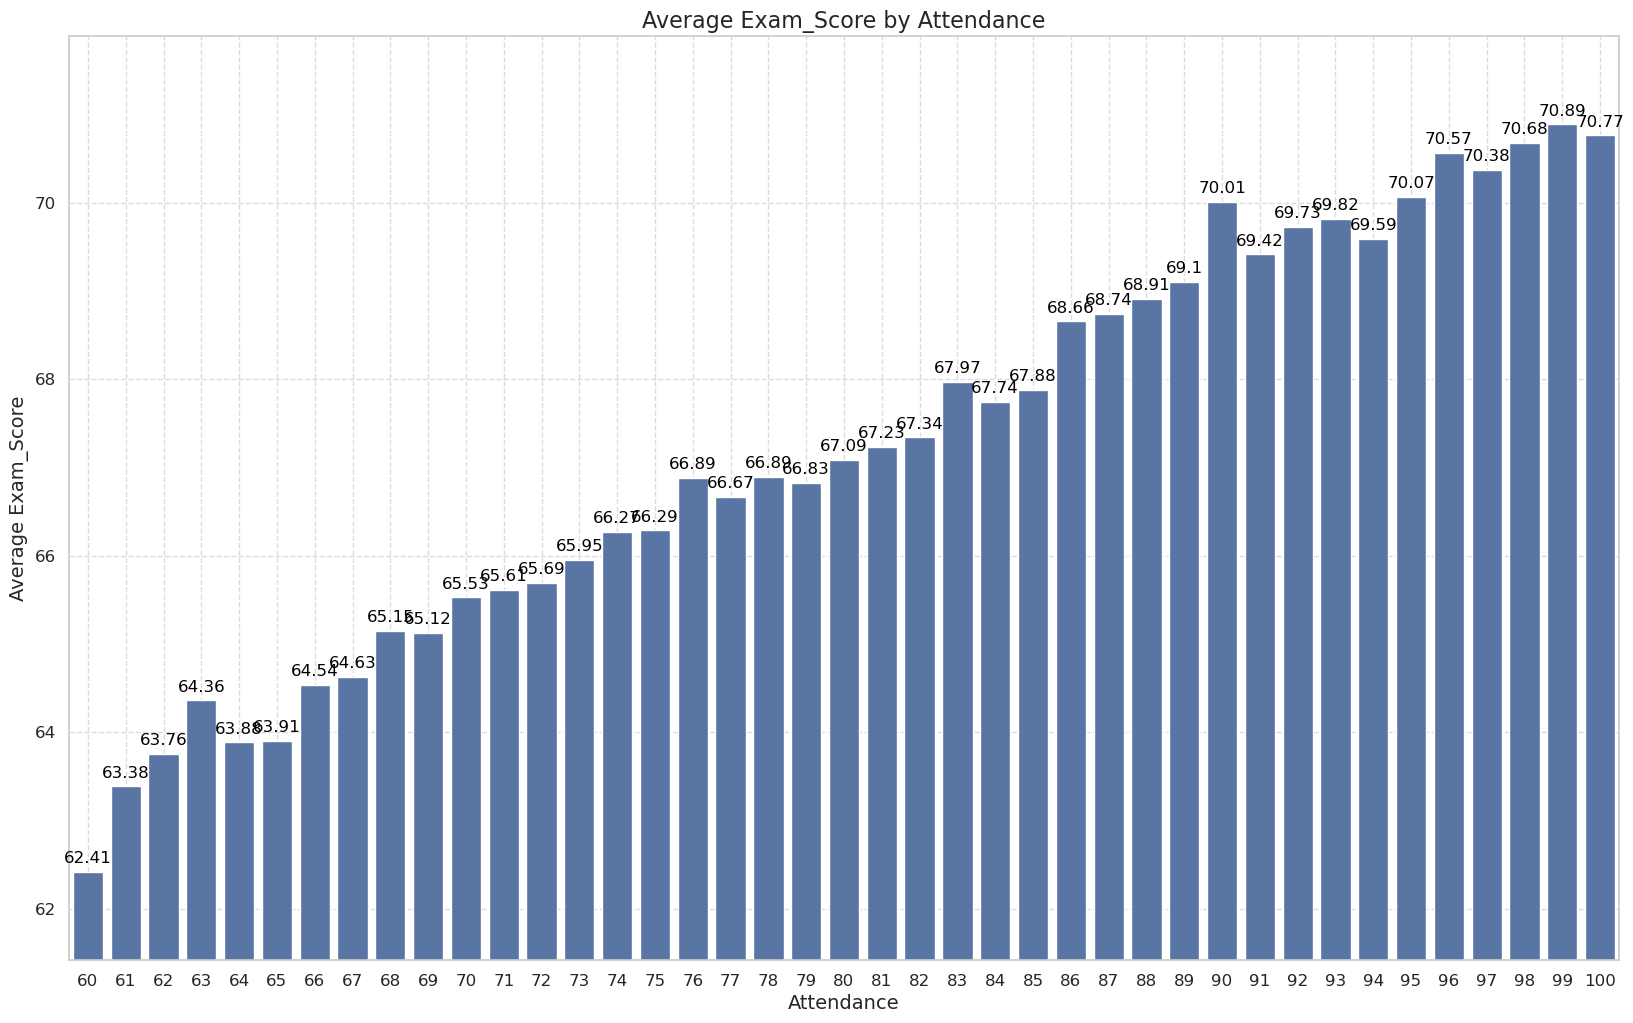

Average Exam_Score by Hours_Studied:
    Hours_Studied  Exam_Score
0               1   71.000000
1               2   63.000000
2               3   61.333333
3               4   61.647059
4               5   62.857143
5               6   63.470588
6               7   64.352941
7               8   64.155172
8               9   64.162791
9              10   64.393617
10             11   64.979452
11             12   64.765625
12             13   64.724771
13             14   65.576208
14             15   65.590476
15             16   66.182336
16             17   66.328084
17             18   67.042394
18             19   66.959184
19             20   66.950538
20             21   67.682135
21             22   67.480100
22             23   68.180049
23             24   68.187675
24             25   68.847751
25             26   68.665399
26             27   69.462882
27             28   69.608187
28             29   70.283582
29             30   70.617886
30             31   70.688312
31 

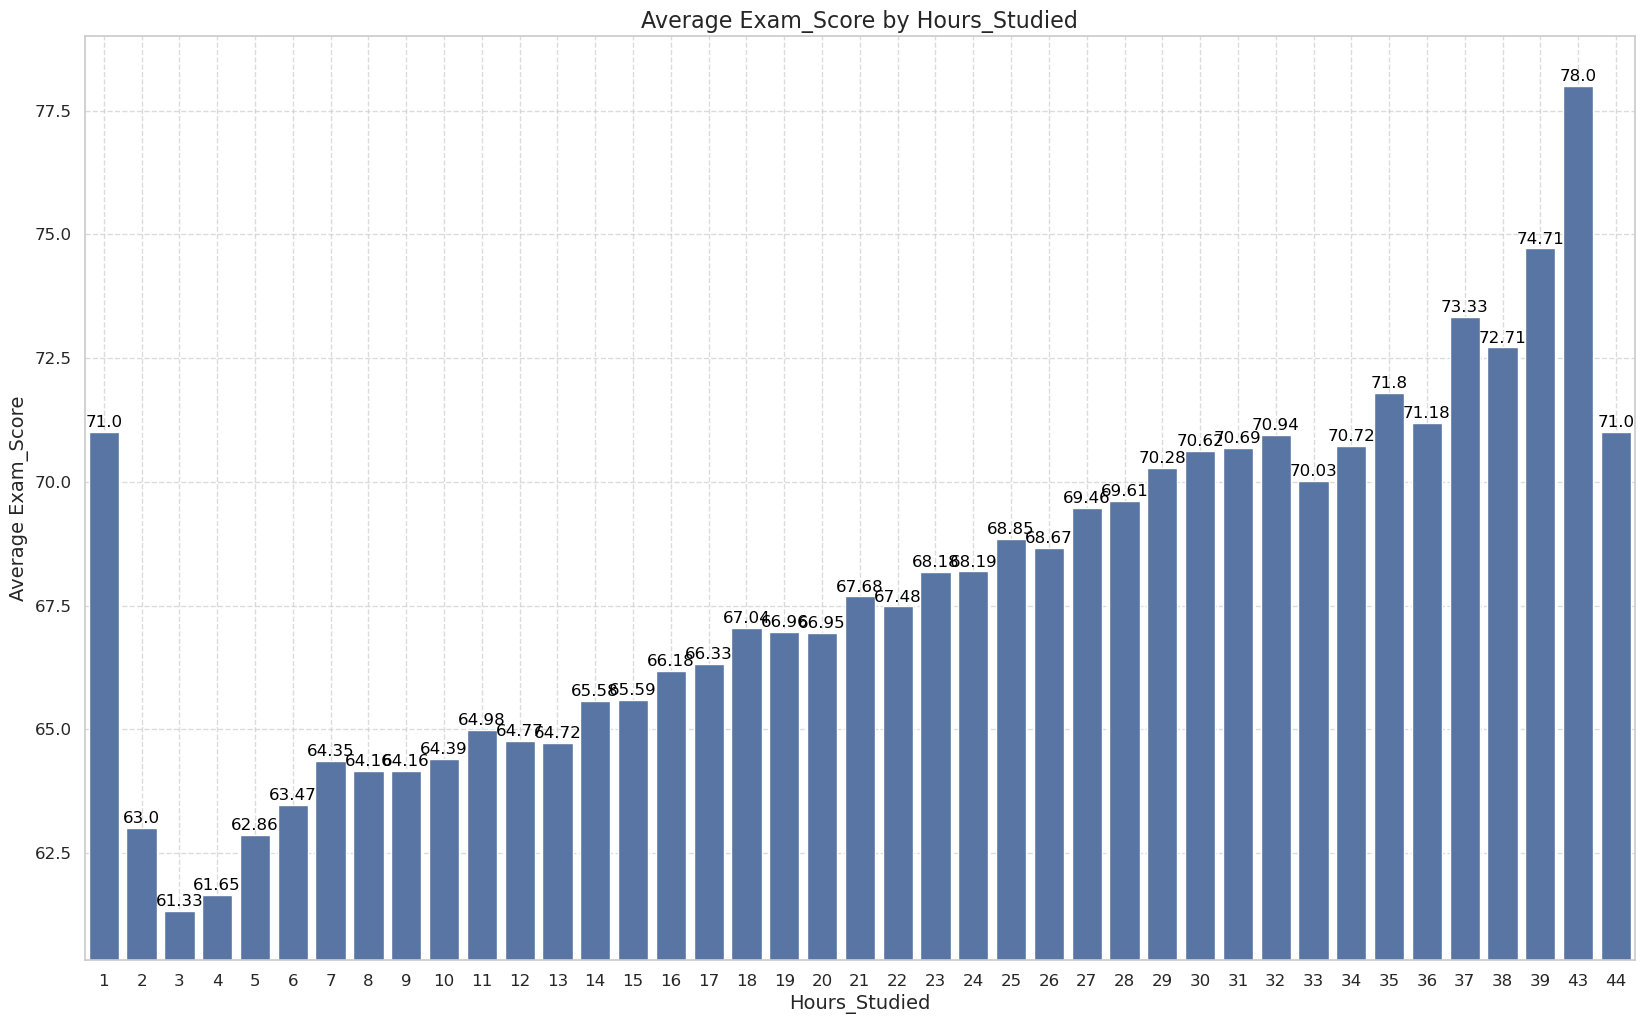

Average Exam_Score by Previous_Scores:
    Previous_Scores  Exam_Score
0                50   65.516129
1                51   65.912698
2                52   66.875000
3                53   66.270833
4                54   66.220588
5                55   66.096774
6                56   66.416667
7                57   66.872000
8                58   66.641667
9                59   66.626761
10               60   66.719008
11               61   66.788618
12               62   66.387097
13               63   66.274074
14               64   66.469697
15               65   66.235294
16               66   66.945455
17               67   66.776119
18               68   66.924242
19               69   67.255814
20               70   66.867647
21               71   66.780822
22               72   67.150000
23               73   66.905797
24               74   66.925373
25               75   67.204545
26               76   67.957143
27               77   67.680328
28               78   67.084615
2

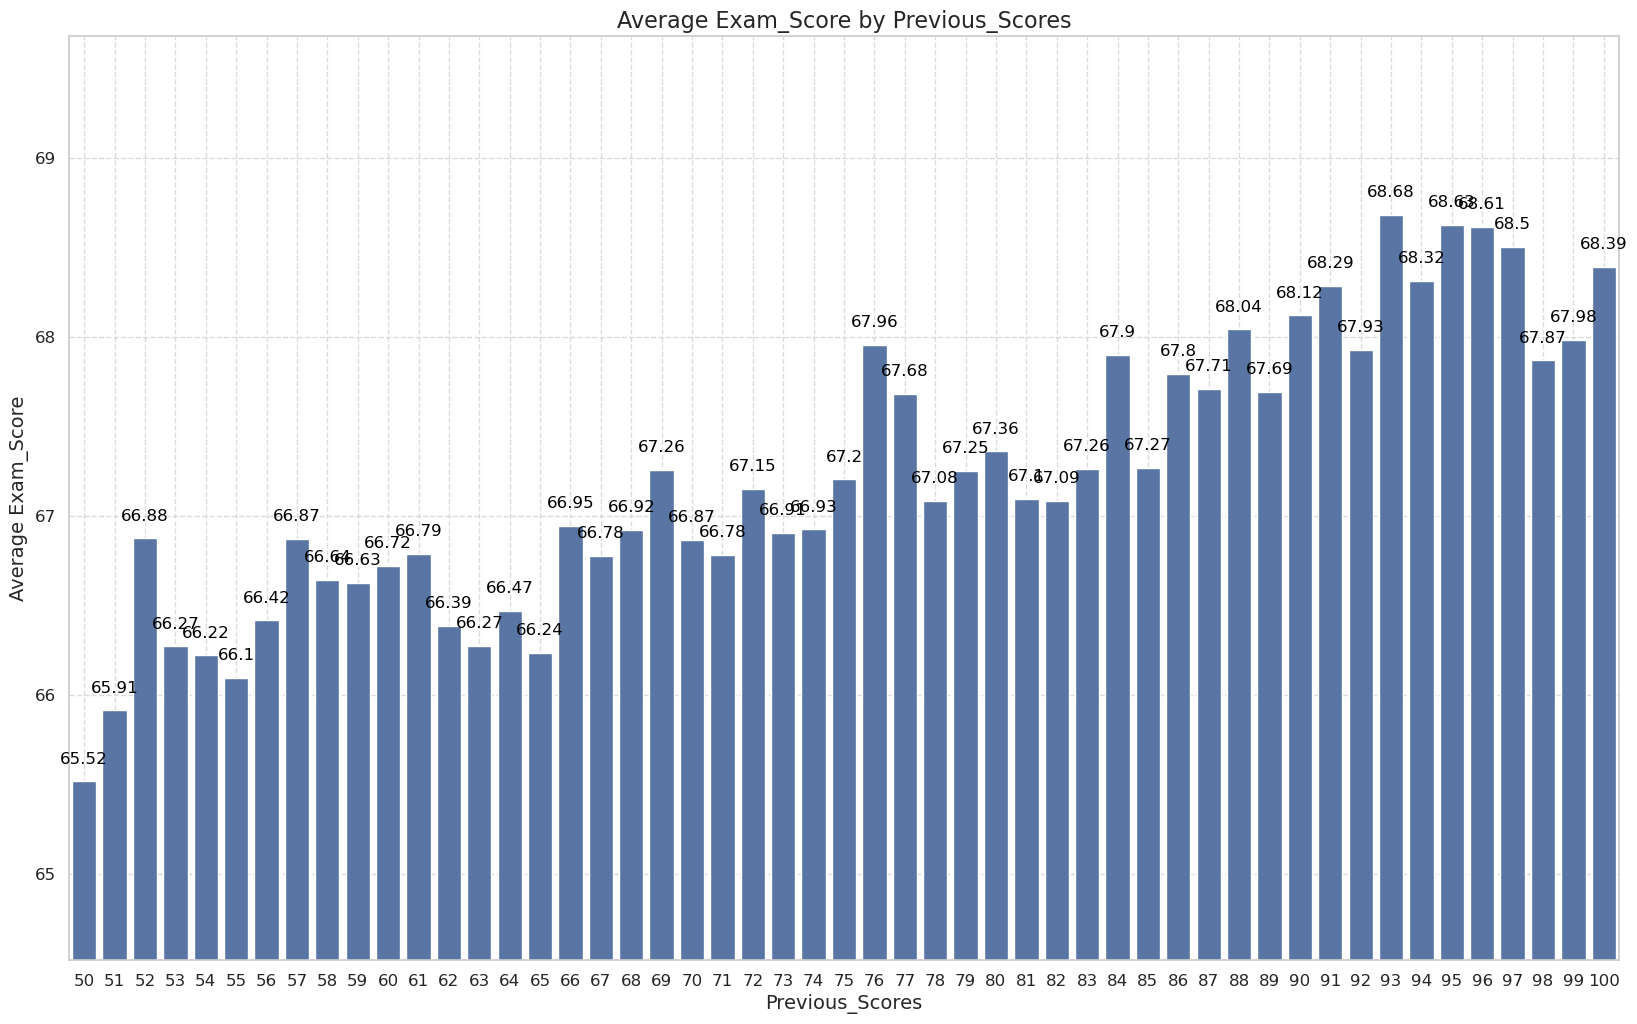

Average Exam_Score by Tutoring_Sessions:
   Tutoring_Sessions  Exam_Score
0                  0   66.489755
1                  1   66.980266
2                  2   67.567010
3                  3   67.894737
4                  4   68.229236
5                  5   69.067961
6                  6   71.666667
7                  7   69.857143
8                  8   69.000000
ANOVA test result for Exam_Score by Tutoring_Sessions: F-statistic = 21.80773640305527, p-value = 4.304698742165406e-33


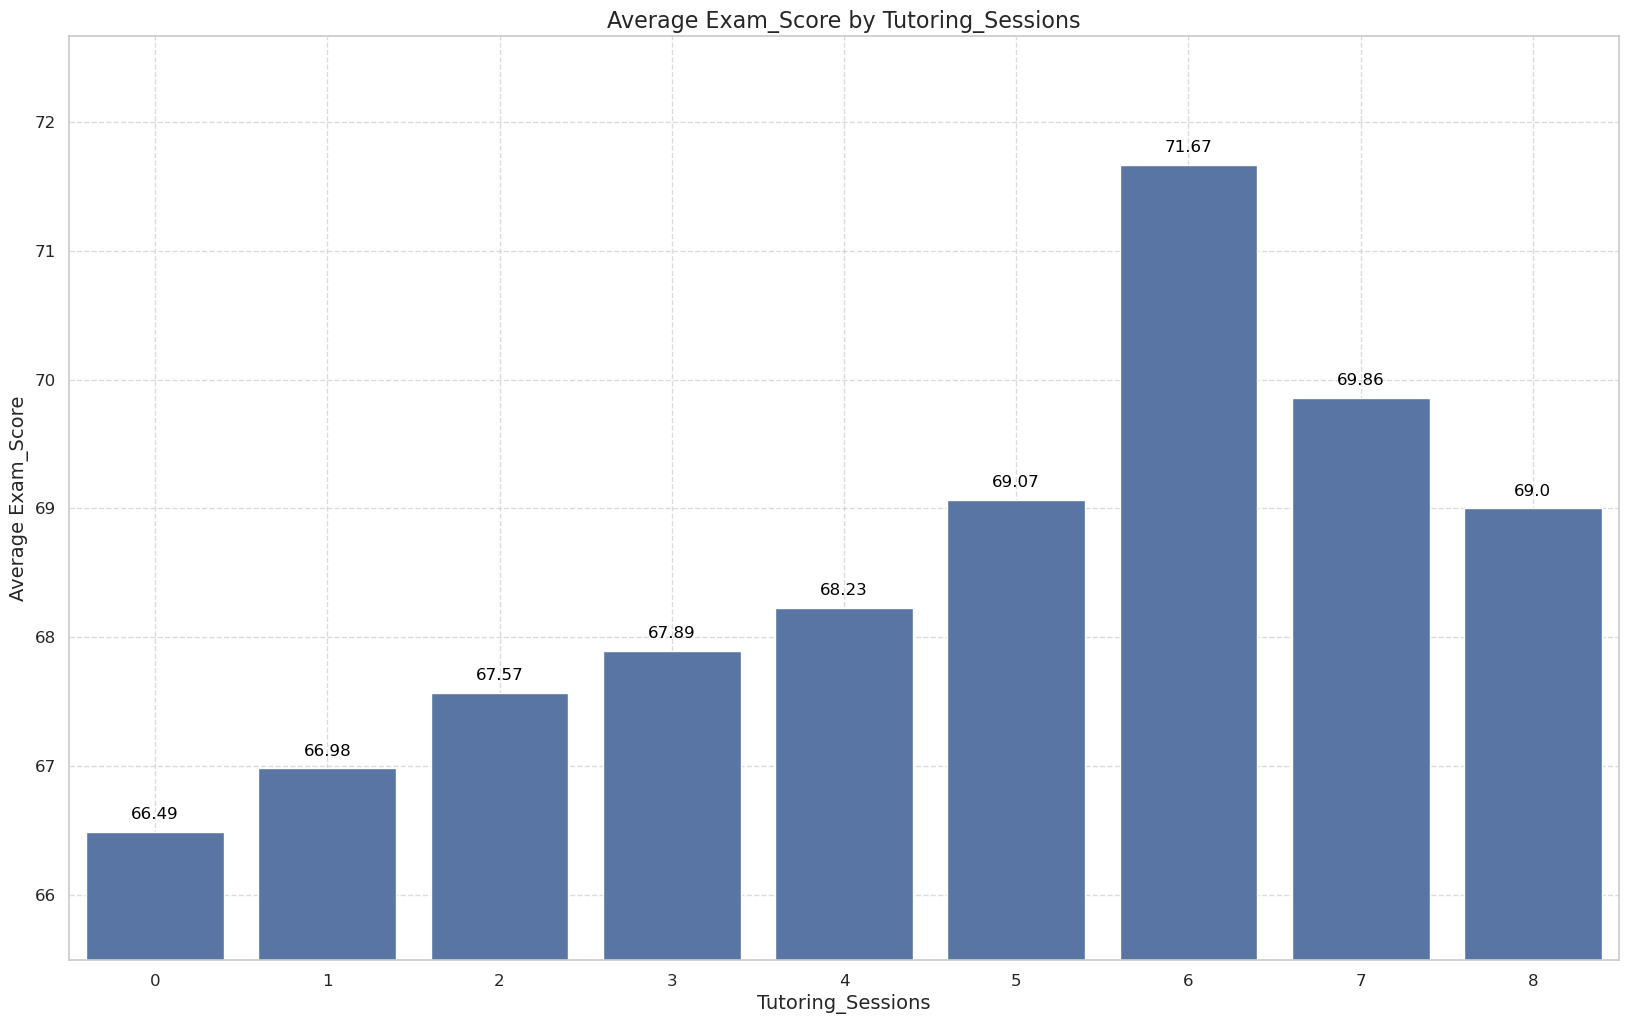

Average Exam_Score by Physical_Activity:
   Physical_Activity  Exam_Score
0                  0   67.521739
1                  1   66.969121
2                  2   67.185003
3                  3   67.196071
4                  4   67.313016
5                  5   67.603878
6                  6   68.093750
ANOVA test result for Exam_Score by Physical_Activity: F-statistic = 1.3633537308841124, p-value = 0.22538316355175445


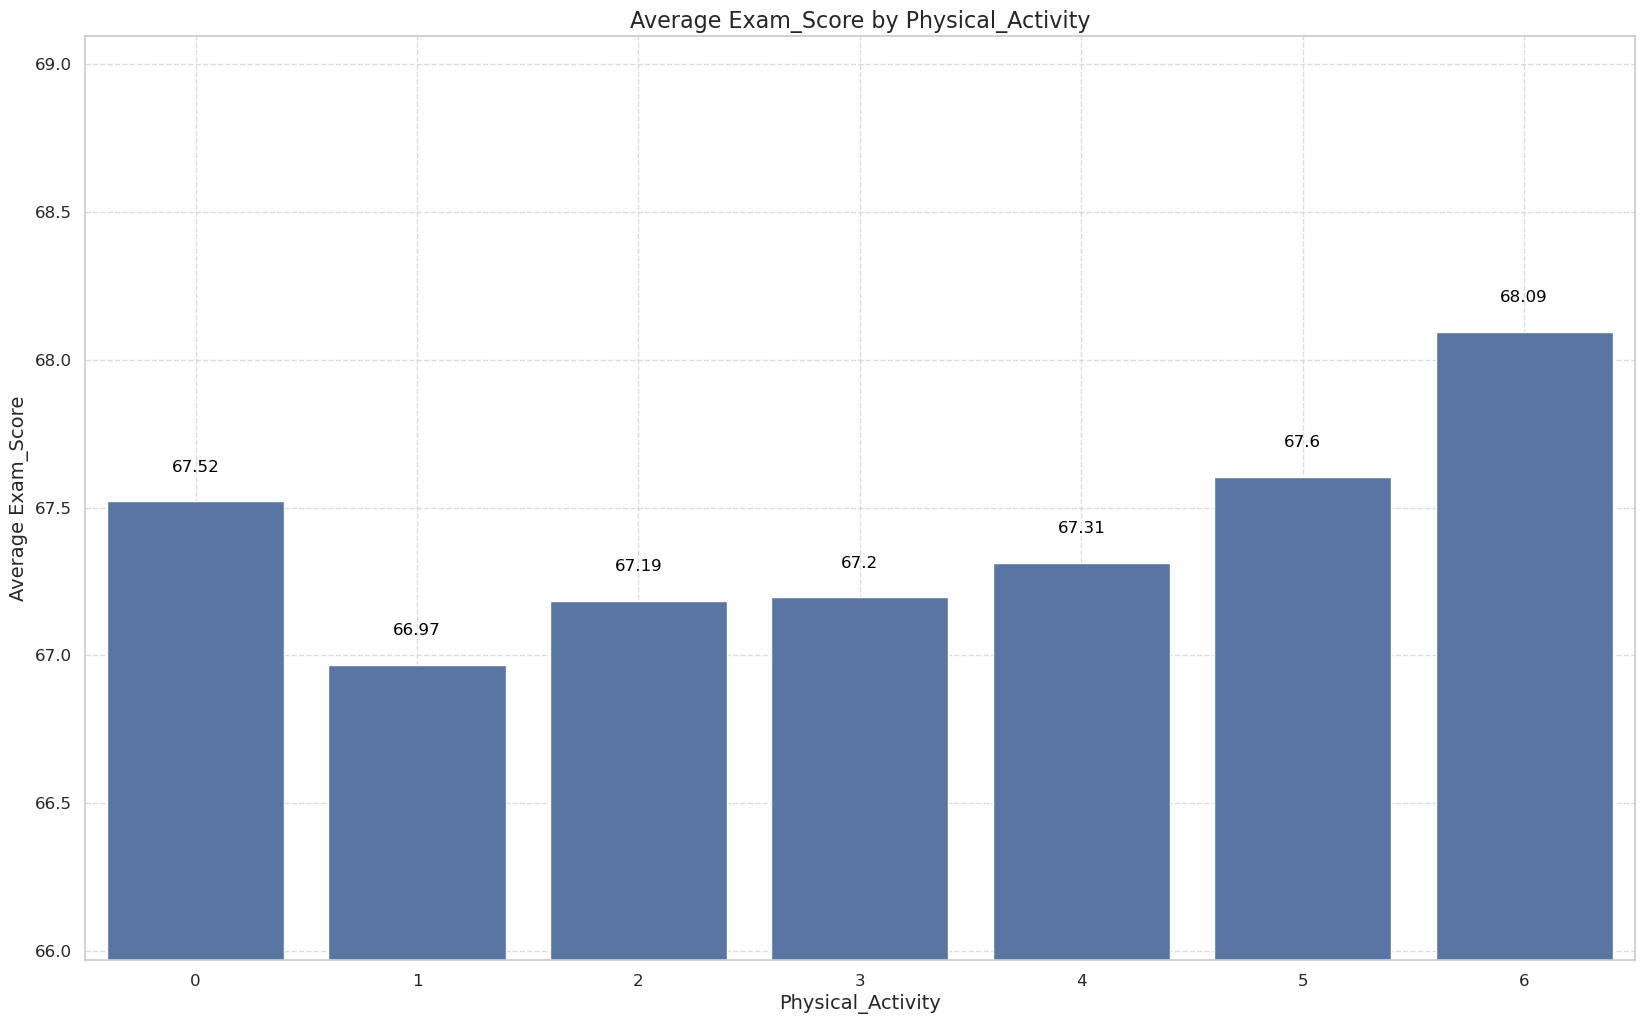

Average Previous_Scores by Hours_Studied:
    Hours_Studied  Previous_Scores
0               1        78.333333
1               2        66.666667
2               3        67.750000
3               4        77.588235
4               5        75.857143
5               6        78.588235
6               7        74.803922
7               8        77.103448
8               9        76.430233
9              10        76.712766
10             11        75.719178
11             12        72.338542
12             13        73.688073
13             14        75.546468
14             15        73.996825
15             16        75.105413
16             17        74.887139
17             18        74.294264
18             19        74.730159
19             20        75.922581
20             21        74.839907
21             22        74.519900
22             23        75.299270
23             24        74.817927
24             25        74.674740
25             26        75.520913
26           

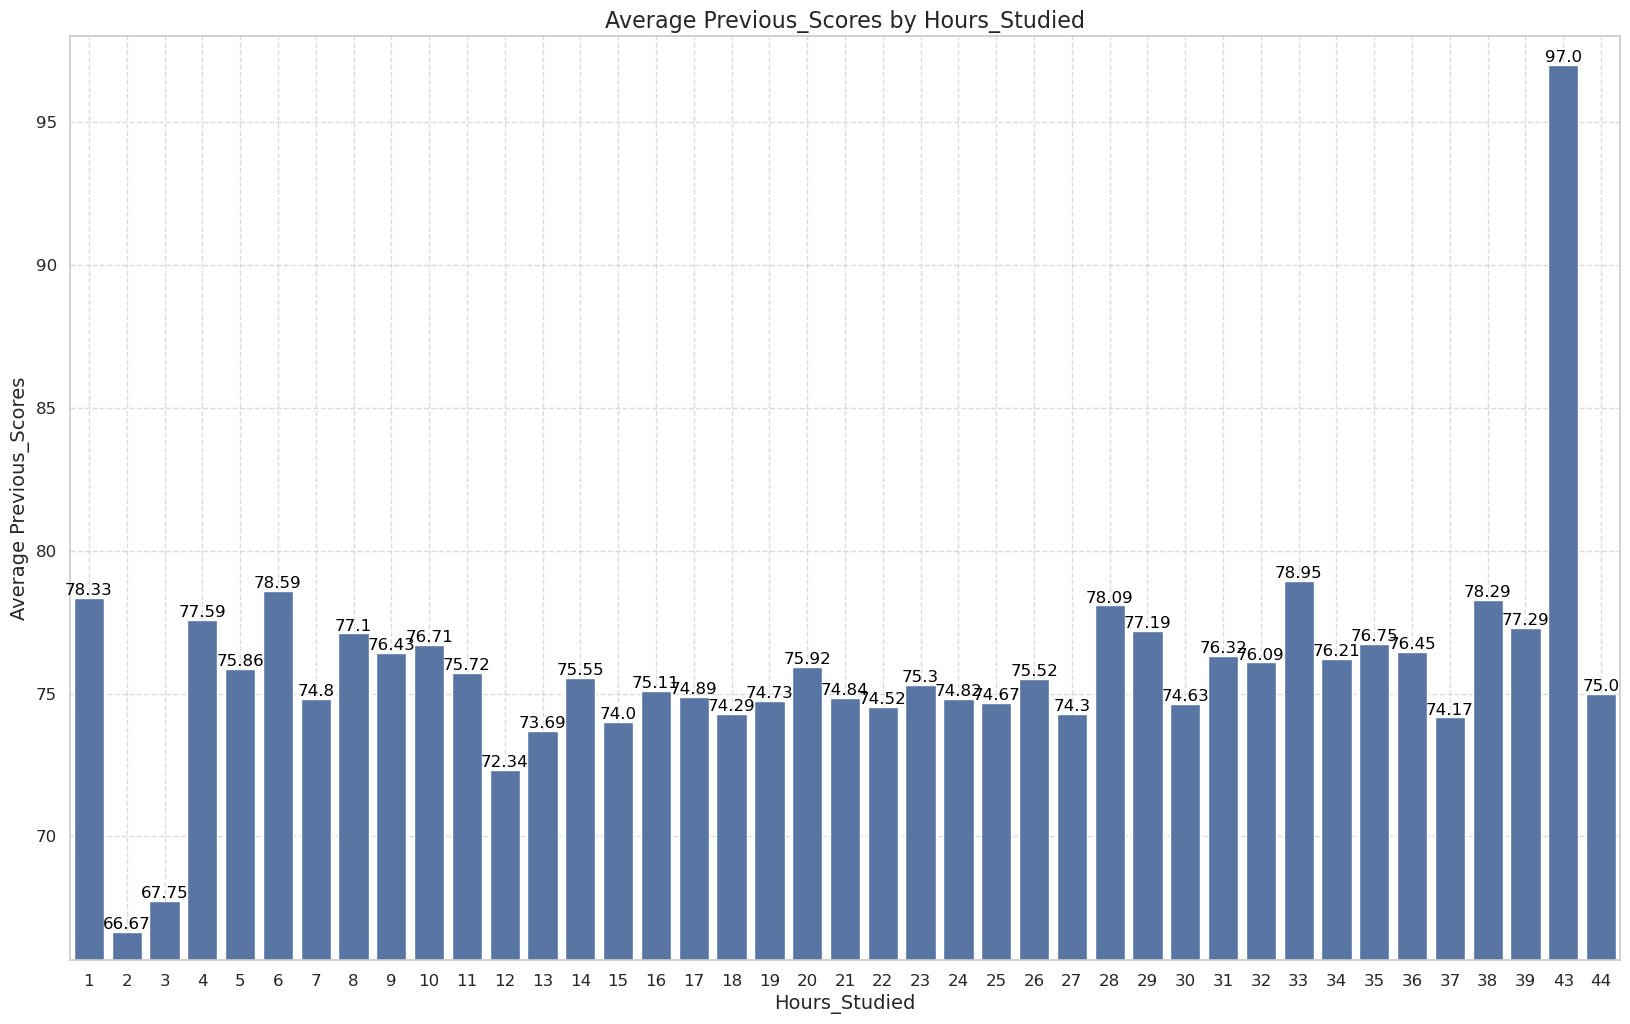

Average Physical_Activity by Tutoring_Sessions:
   Tutoring_Sessions  Physical_Activity
0                  0           2.966292
1                  1           2.973841
2                  2           2.934506
3                  3           2.940191
4                  4           3.079734
5                  5           3.165049
6                  6           3.388889
7                  7           3.428571
8                  8           4.000000
ANOVA test result for Physical_Activity by Tutoring_Sessions: F-statistic = 1.8909485606399026, p-value = 0.056907347155568874


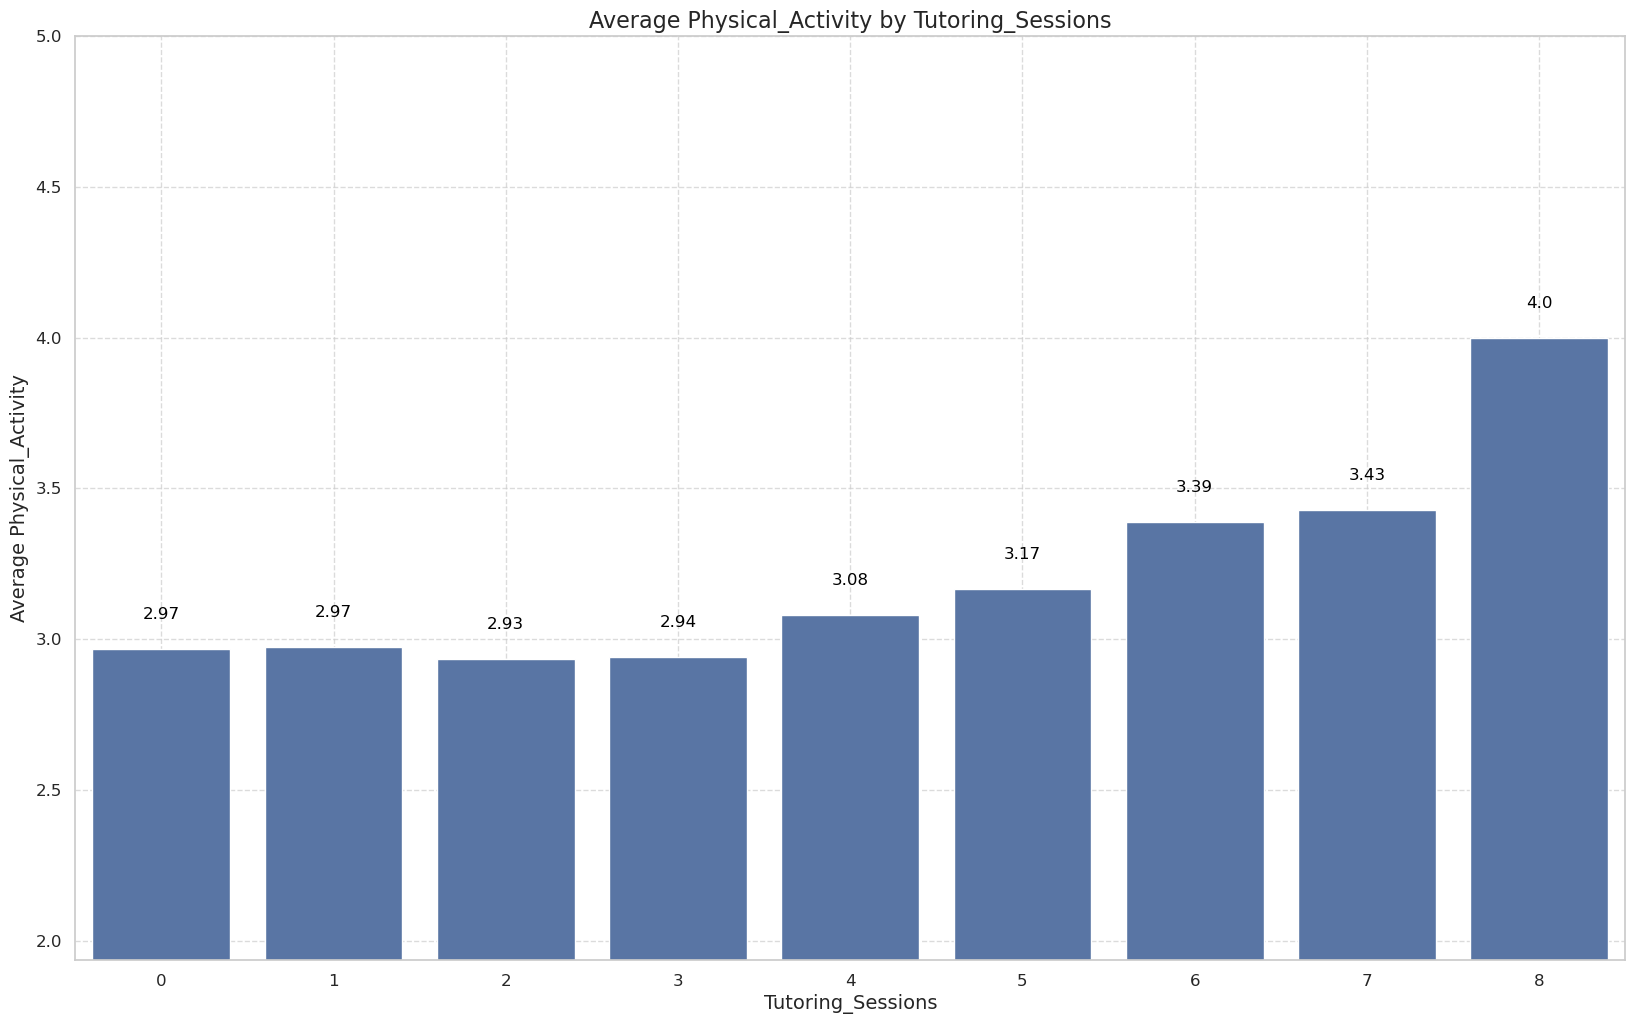

Average Tutoring_Sessions by Attendance:
    Attendance  Tutoring_Sessions
0           60           1.390805
1           61           1.408537
2           62           1.592105
3           63           1.483871
4           64           1.521978
5           65           1.537975
6           66           1.503448
7           67           1.268421
8           68           1.429412
9           69           1.352941
10          70           1.391304
11          71           1.543210
12          72           1.700599
13          73           1.488095
14          74           1.490909
15          75           1.402685
16          76           1.518919
17          77           1.521739
18          78           1.333333
19          79           1.531429
20          80           1.408284
21          81           1.410714
22          82           1.520231
23          83           1.541401
24          84           1.560000
25          85           1.547945
26          86           1.622517
27     

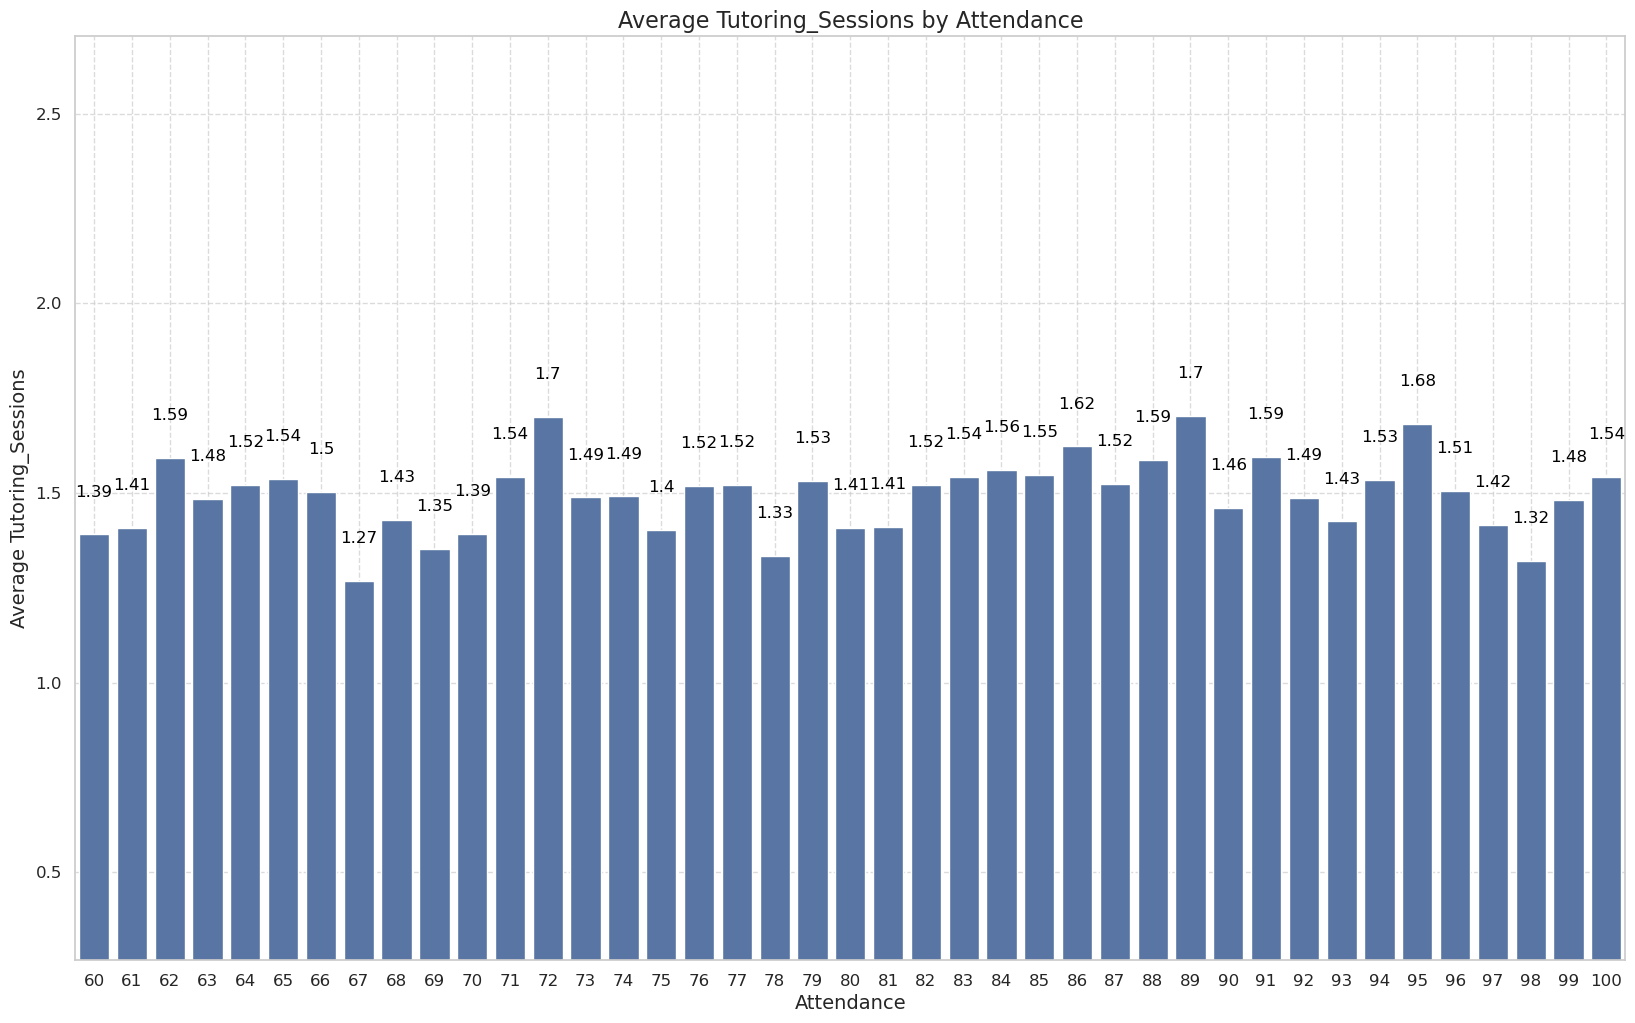

Average Sleep_Hours by Hours_Studied:
    Hours_Studied  Sleep_Hours
0               1     6.000000
1               2     7.166667
2               3     7.083333
3               4     6.823529
4               5     7.428571
5               6     7.235294
6               7     7.313725
7               8     7.137931
8               9     7.116279
9              10     6.946809
10             11     7.020548
11             12     6.833333
12             13     6.940367
13             14     6.866171
14             15     7.047619
15             16     7.028490
16             17     7.144357
17             18     6.952618
18             19     7.154195
19             20     6.976344
20             21     6.974478
21             22     6.980100
22             23     7.058394
23             24     7.165266
24             25     6.961938
25             26     6.973384
26             27     7.069869
27             28     7.052632
28             29     7.074627
29             30     7.146341
3

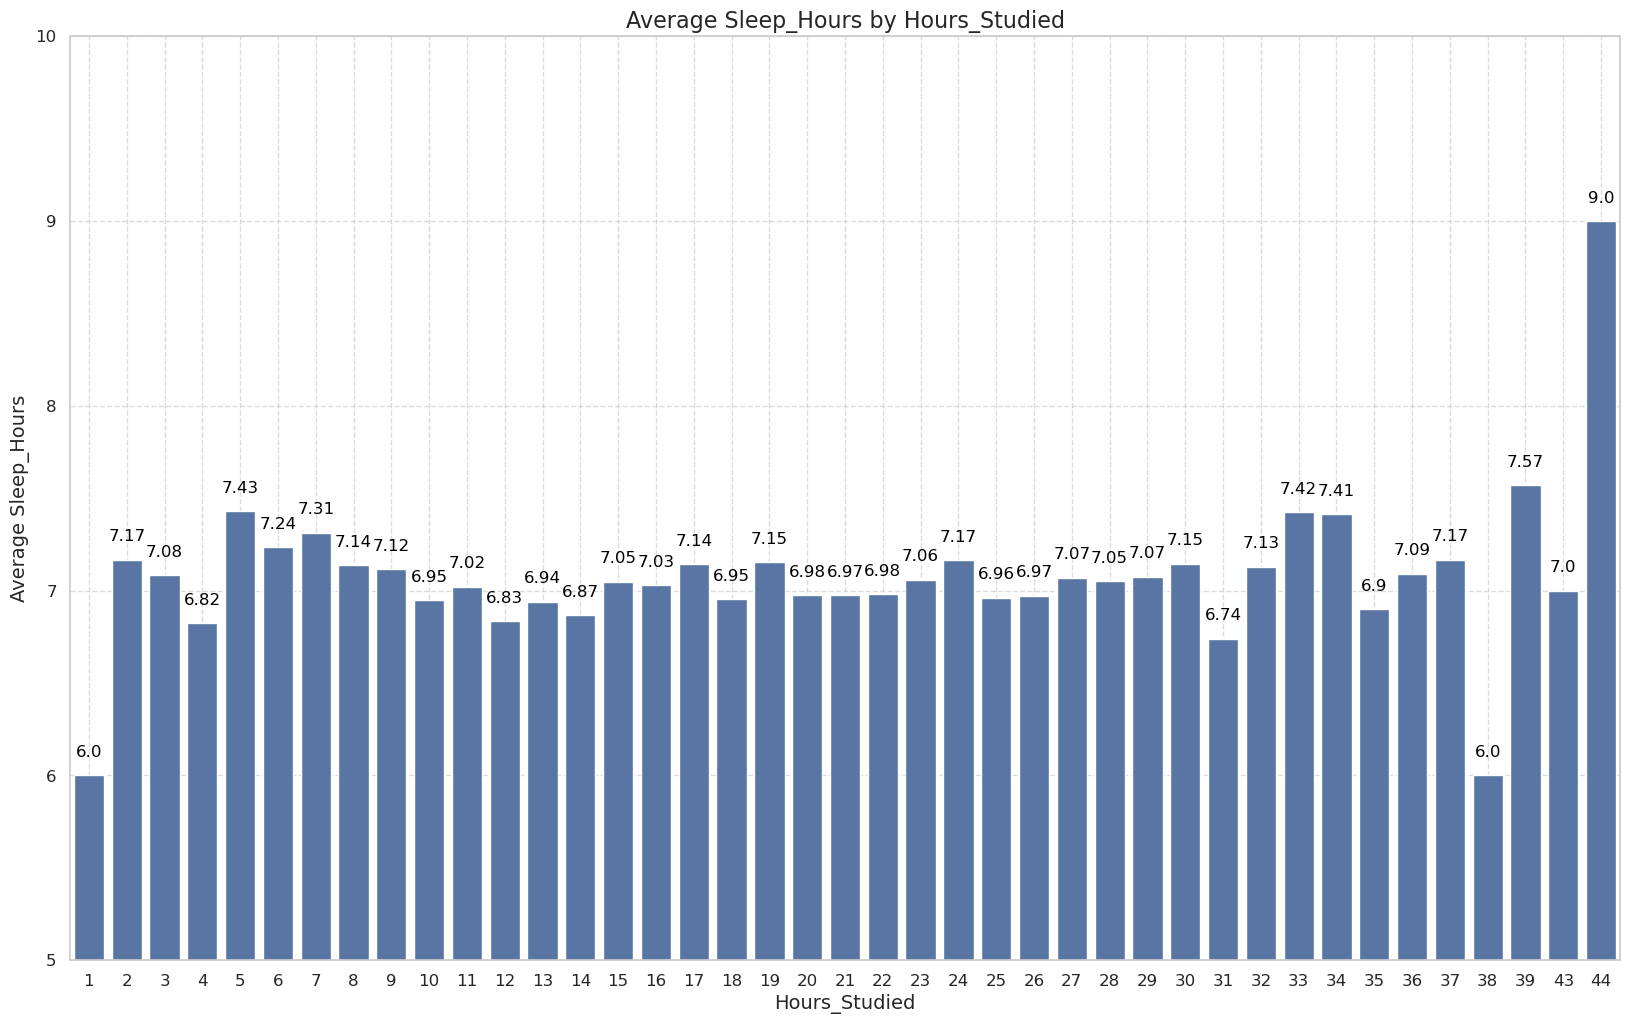

Average Physical_Activity by Hours_Studied:
    Hours_Studied  Physical_Activity
0               1           2.333333
1               2           2.500000
2               3           3.000000
3               4           3.000000
4               5           3.047619
5               6           2.764706
6               7           2.921569
7               8           2.844828
8               9           2.976744
9              10           2.968085
10             11           2.952055
11             12           2.942708
12             13           2.977064
13             14           2.988848
14             15           2.958730
15             16           2.988604
16             17           3.041995
17             18           2.962594
18             19           3.038549
19             20           3.045161
20             21           2.916473
21             22           2.883085
22             23           2.858881
23             24           2.857143
24             25           3.0

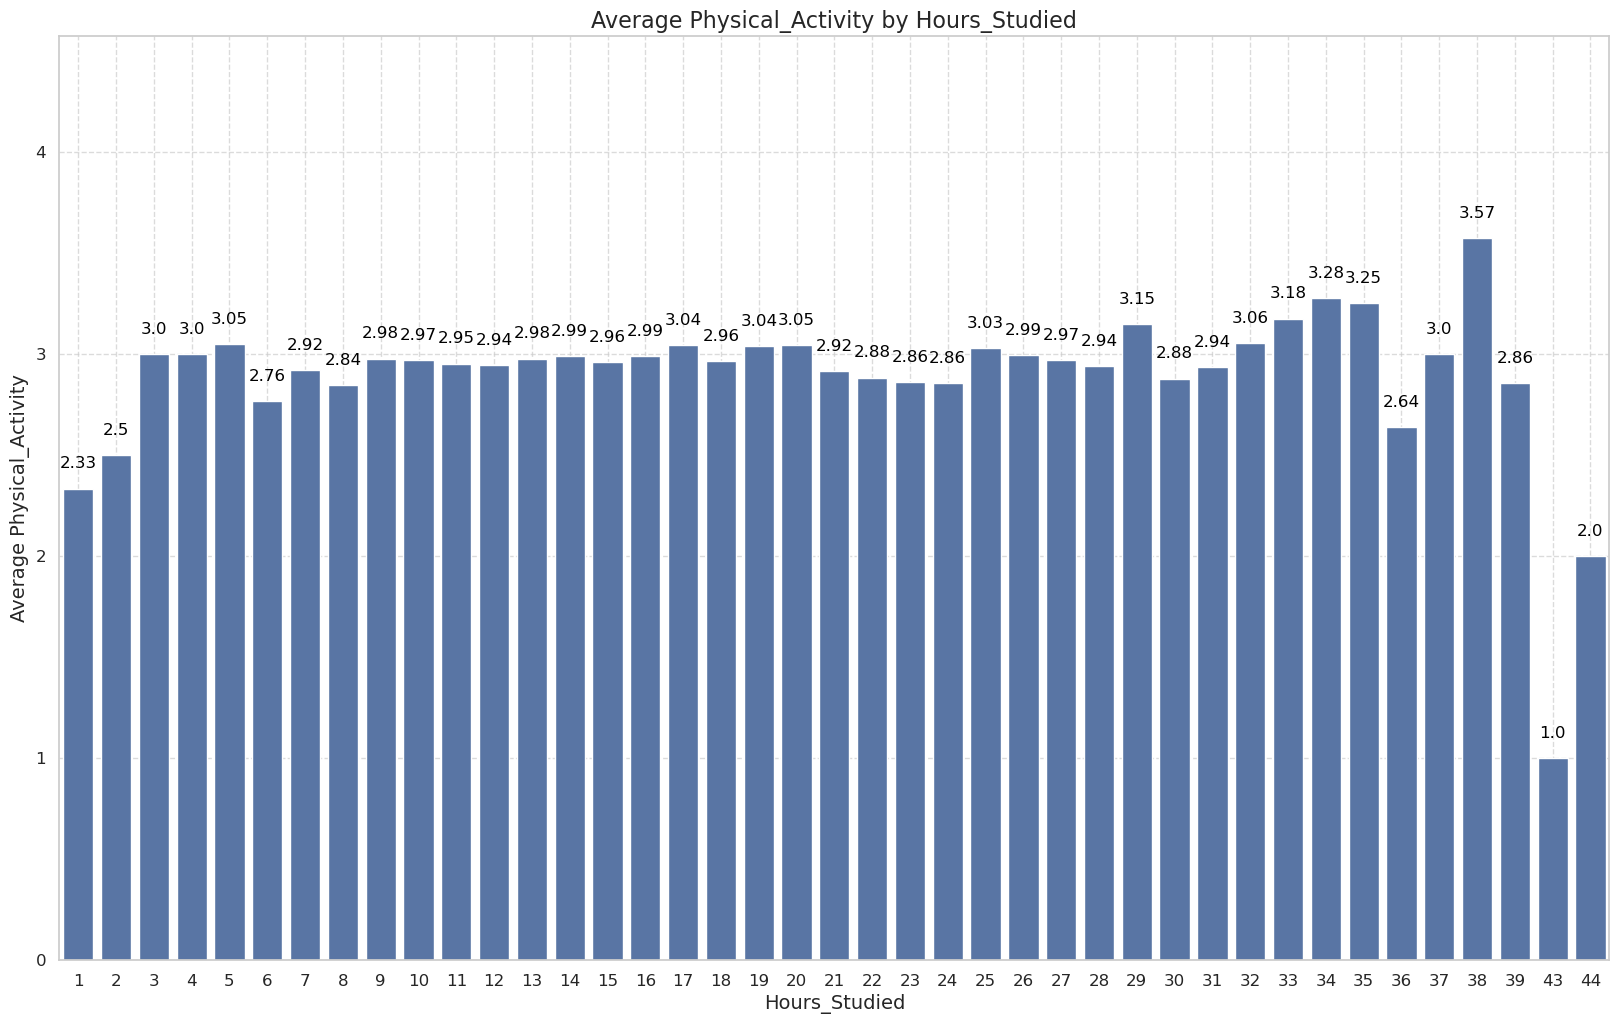

Average Physical_Activity by Sleep_Hours:
   Sleep_Hours  Physical_Activity
0            4           3.009709
1            5           2.958273
2            6           2.969477
3            7           2.944285
4            8           2.994282
5            9           2.961290
6           10           2.964744
ANOVA test result for Physical_Activity by Sleep_Hours: F-statistic = 0.4055345086102893, p-value = 0.8758350430029559


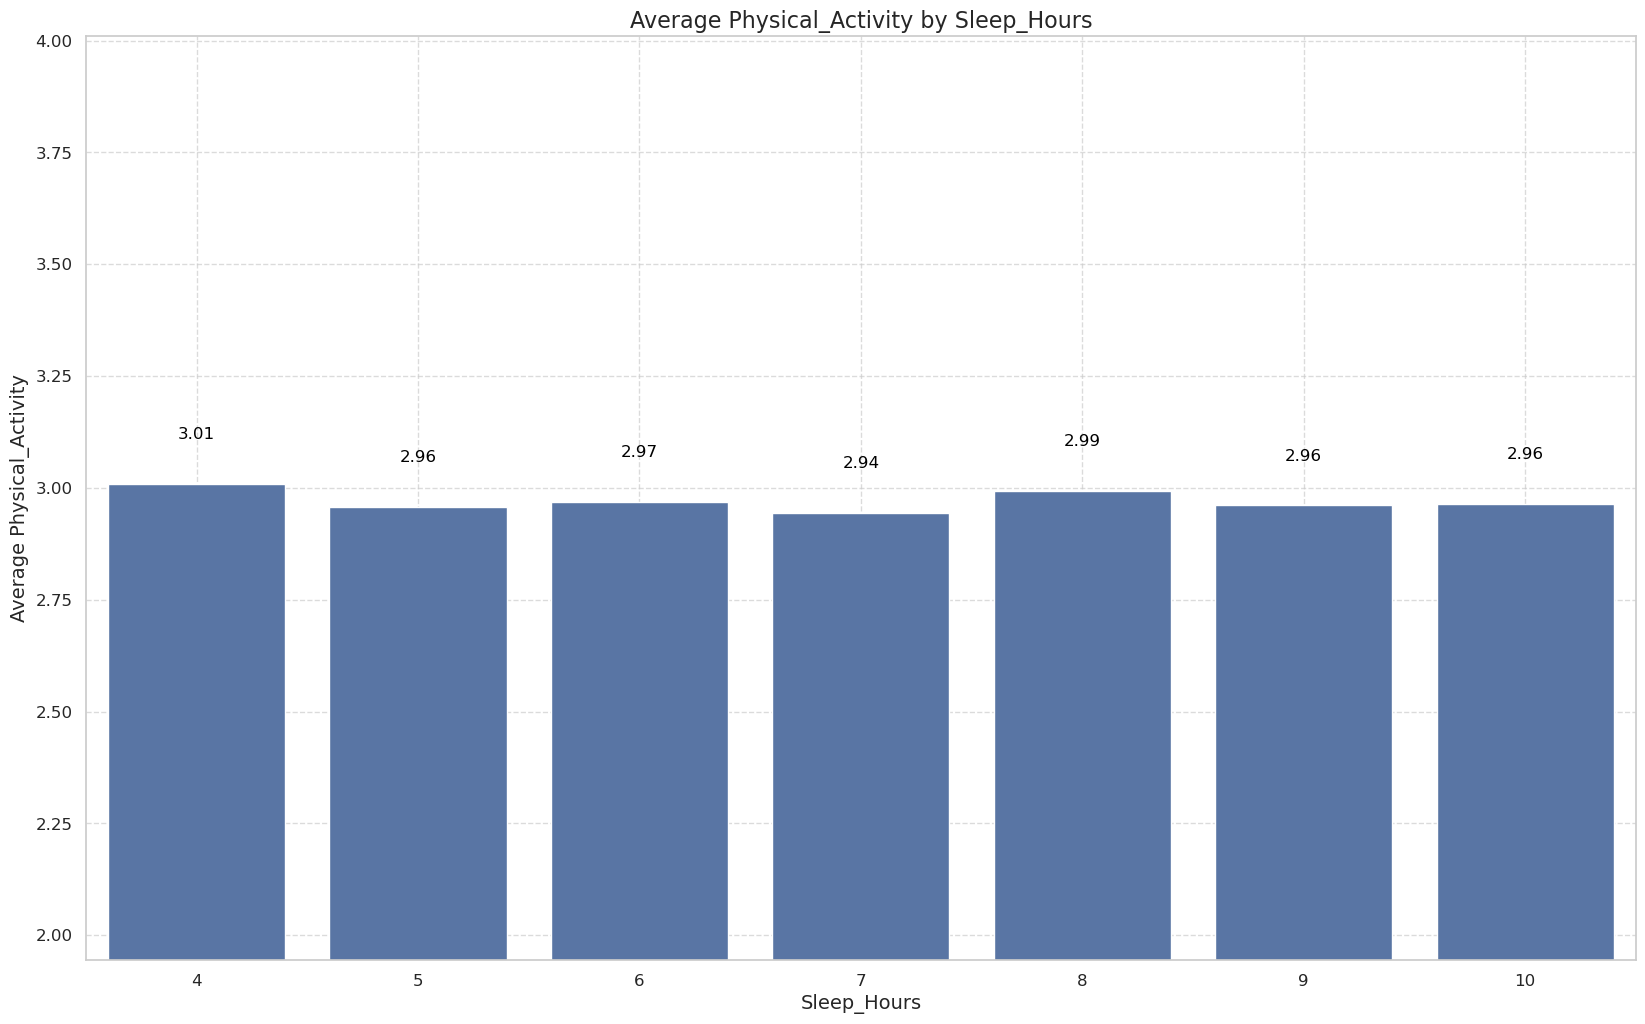

Average Attendance by Hours_Studied:
    Hours_Studied  Attendance
0               1   79.333333
1               2   90.333333
2               3   80.000000
3               4   75.705882
4               5   80.952381
5               6   80.882353
6               7   79.588235
7               8   80.344828
8               9   80.476744
9              10   79.936170
10             11   81.041096
11             12   81.046875
12             13   79.233945
13             14   79.765799
14             15   79.726984
15             16   79.484330
16             17   80.325459
17             18   80.364090
18             19   80.036281
19             20   80.066667
20             21   80.879350
21             22   78.721393
22             23   80.476886
23             24   79.406162
24             25   80.069204
25             26   79.087452
26             27   80.550218
27             28   78.473684
28             29   81.604478
29             30   81.081301
30             31   79.220779
31 

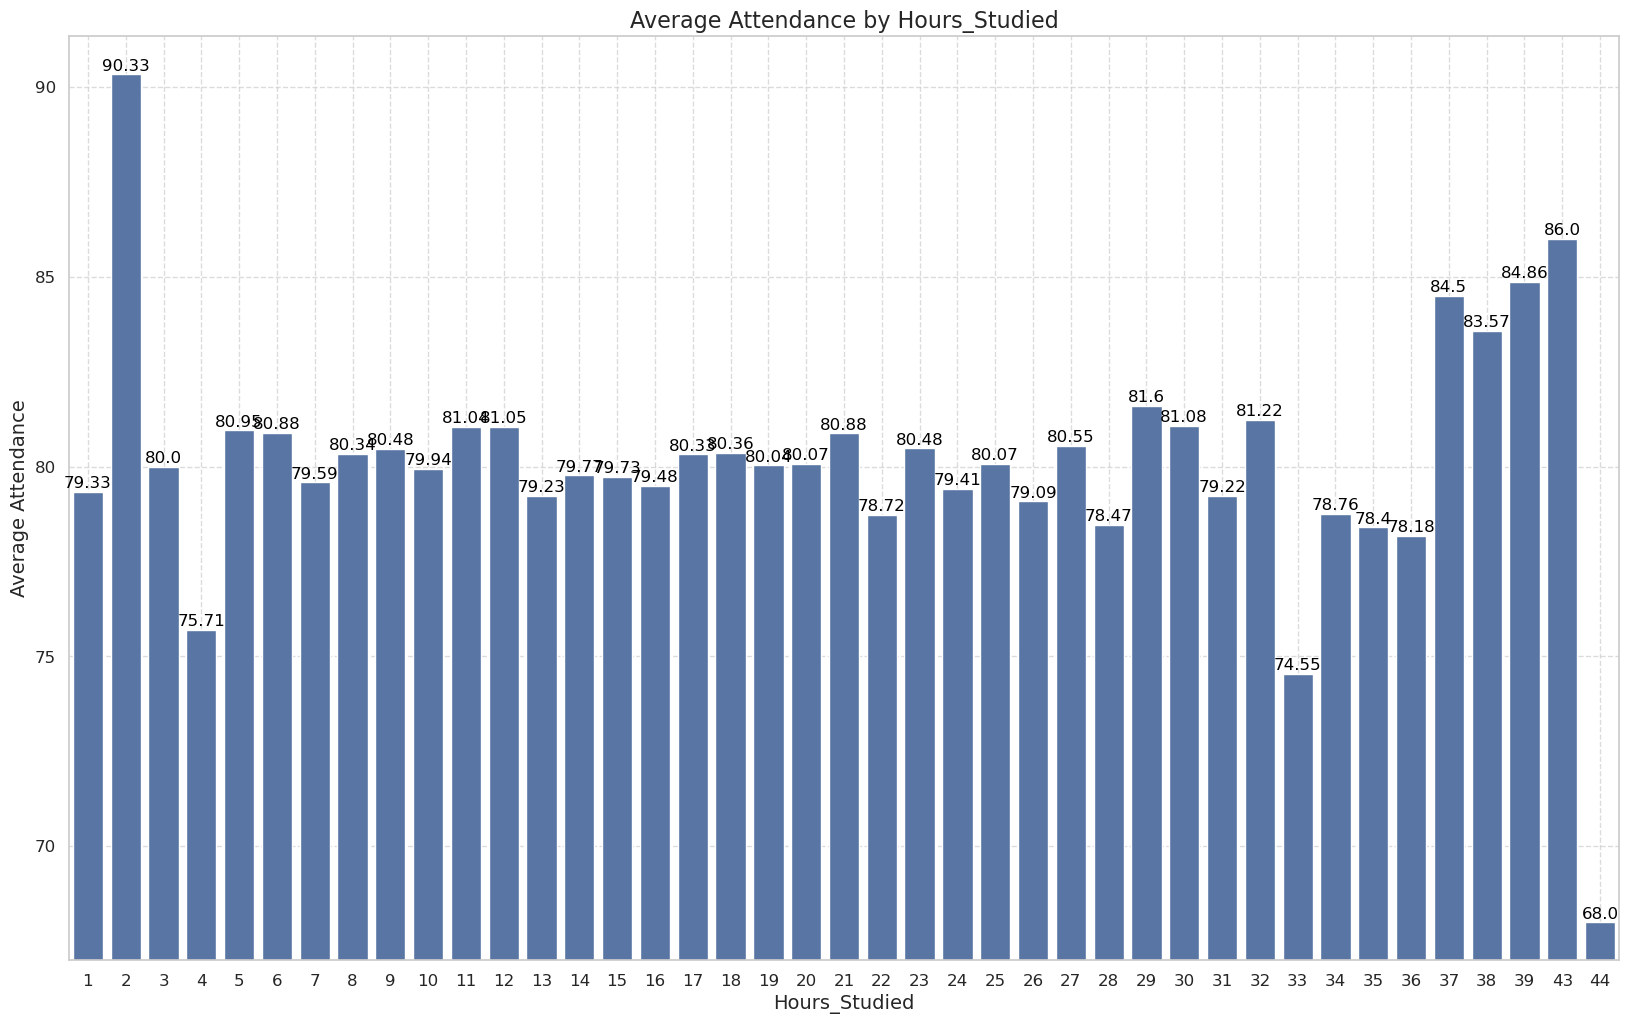

Average Physical_Activity by Previous_Scores:
    Previous_Scores  Physical_Activity
0                50           2.951613
1                51           2.968254
2                52           3.073529
3                53           2.916667
4                54           2.794118
5                55           2.959677
6                56           2.900000
7                57           2.952000
8                58           2.933333
9                59           3.000000
10               60           2.966942
11               61           3.113821
12               62           2.959677
13               63           2.933333
14               64           3.000000
15               65           3.080882
16               66           3.042424
17               67           3.097015
18               68           3.053030
19               69           3.069767
20               70           3.066176
21               71           2.965753
22               72           2.933333
23               7

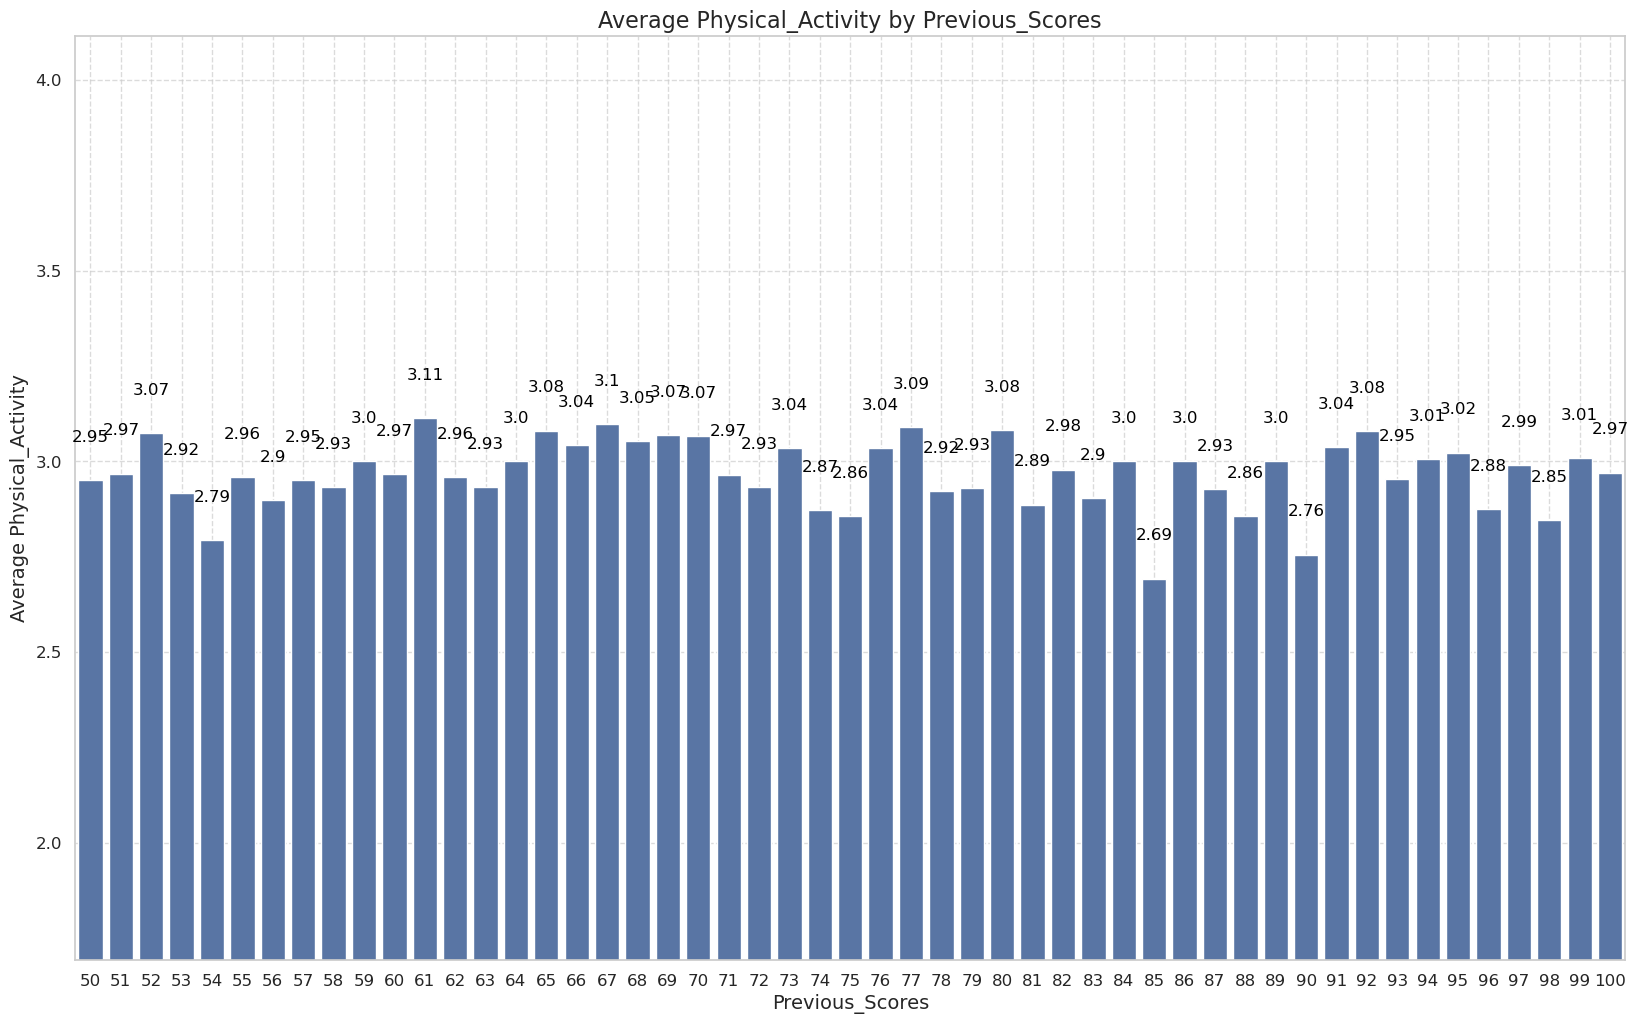

Average Tutoring_Sessions by Sleep_Hours:
   Sleep_Hours  Tutoring_Sessions
0            4           1.563107
1            5           1.438849
2            6           1.519622
3            7           1.500287
4            8           1.518227
5            9           1.445161
6           10           1.407051
ANOVA test result for Tutoring_Sessions by Sleep_Hours: F-statistic = 1.055513903924955, p-value = 0.3870485105041099


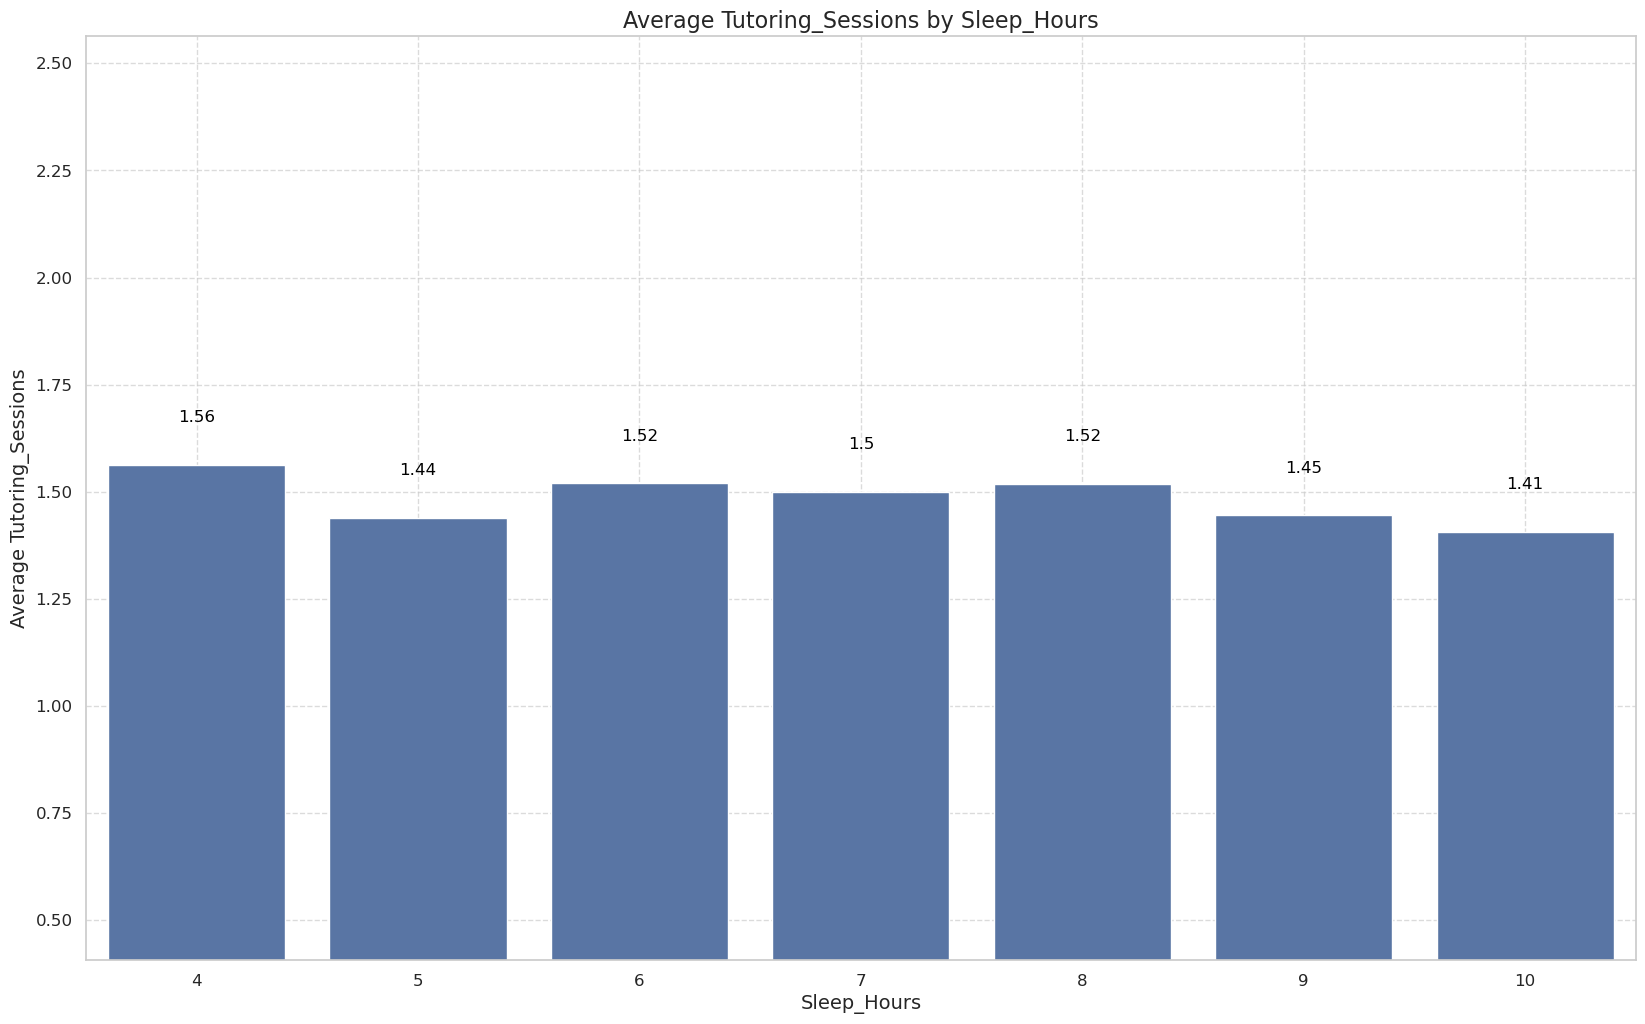

Average Tutoring_Sessions by Previous_Scores:
    Previous_Scores  Tutoring_Sessions
0                50           1.548387
1                51           1.484127
2                52           1.610294
3                53           1.479167
4                54           1.477941
5                55           1.475806
6                56           1.491667
7                57           1.584000
8                58           1.600000
9                59           1.654930
10               60           1.429752
11               61           1.552846
12               62           1.596774
13               63           1.303704
14               64           1.454545
15               65           1.492647
16               66           1.424242
17               67           1.567164
18               68           1.416667
19               69           1.697674
20               70           1.544118
21               71           1.301370
22               72           1.658333
23               7

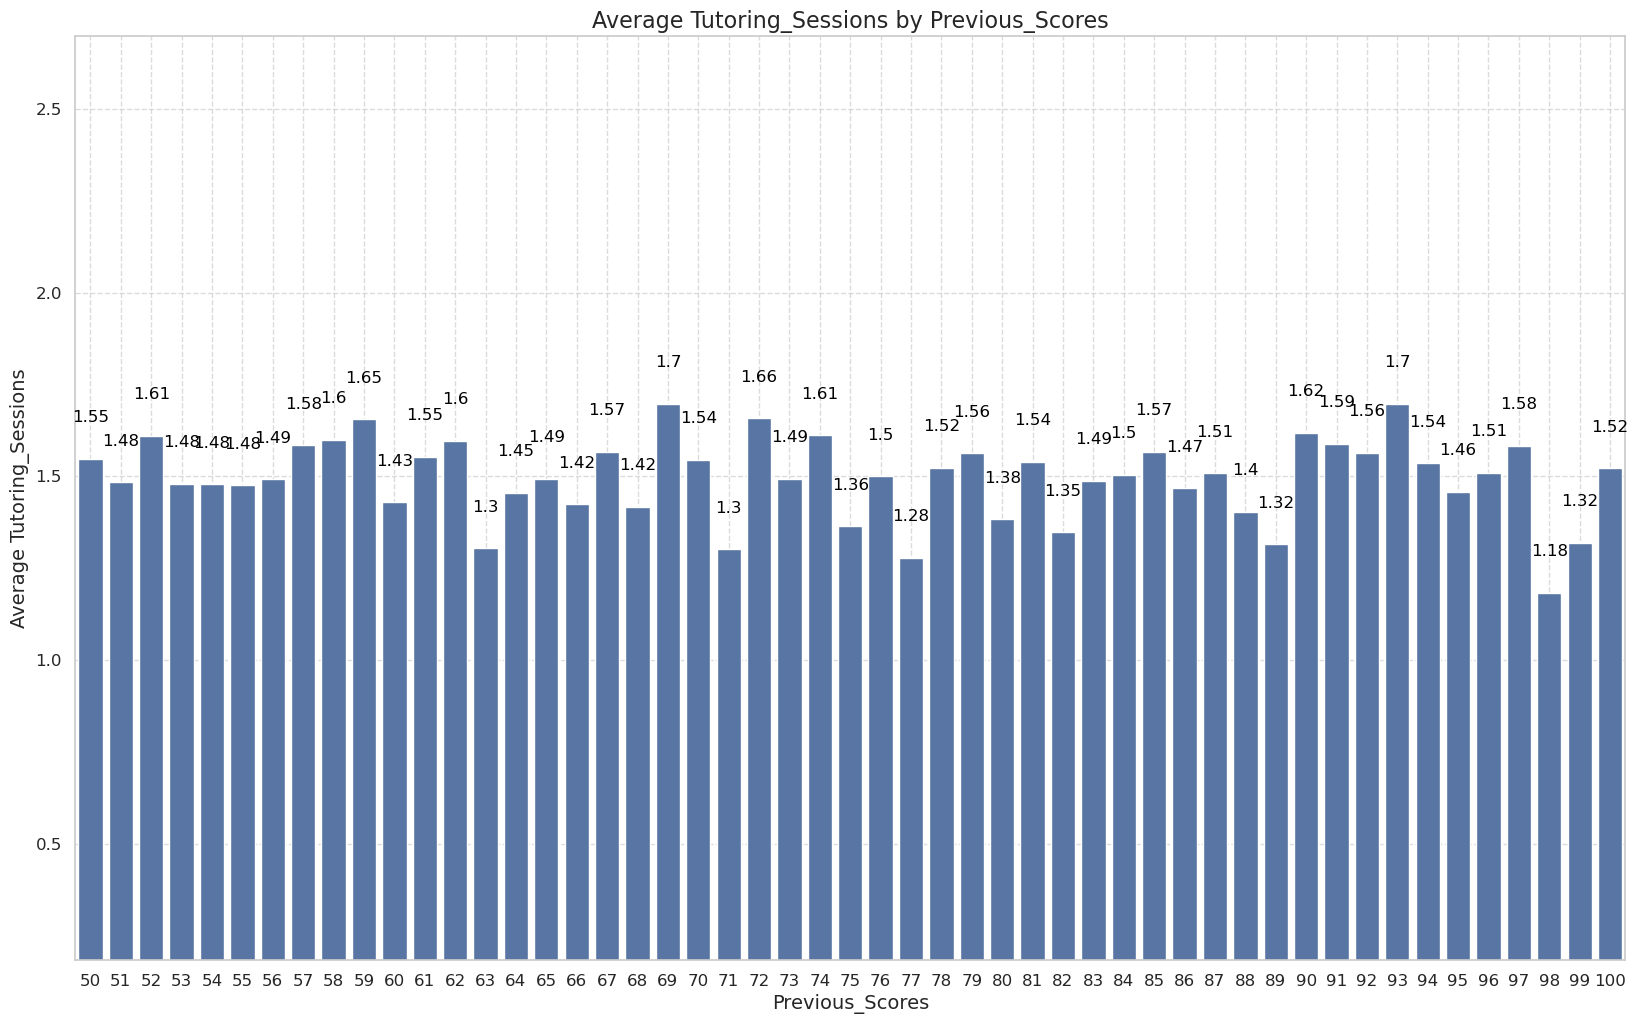

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Assuming data is your DataFrame

# Set Seaborn style
sns.set(style="whitegrid")


for category_col, value_col in top_pairs:
    category_col, value_col = value_col, category_col

    # Group by category_col and calculate the mean of value_col
    average_scores = data.groupby(category_col)[value_col].mean().reset_index()
    print(f"Average {value_col} by {category_col}:")
    print(average_scores)

    # Perform ANOVA test
    category_groups = [data[data[category_col] == category][value_col] for category in data[category_col].unique()]
    anova_result = f_oneway(*category_groups)
    print(f"ANOVA test result for {value_col} by {category_col}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

    # Create a bar plot for average value_col by category_col
    plt.figure(figsize=np.array((10, 6)) * 2)
    bar_plot = sns.barplot(data=average_scores, x=category_col, y=value_col)

    # Add data labels
    for index, row in average_scores.iterrows():
        bar_plot.text(row.name, row[value_col] + 0.1, round(row[value_col], 2), color='black', ha="center")

    # Adjust y-axis limits to zoom in on the range of interest
    plt.ylim(average_scores[value_col].min() - 1, average_scores[value_col].max() + 1)

    plt.title(f'Average {value_col} by {category_col}', fontsize=16)
    plt.xlabel(category_col, fontsize=14)
    plt.ylabel(f'Average {value_col}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()